<a href="https://colab.research.google.com/github/Harini64/eda/blob/main/22BDS0085_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BCSE331L – Exploratory Data Analysis
**Reg. No.: 22BDS0085**  
**Name: Harini G**

**Dataset:** Crime.csv  


Import and setup

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.grid": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10
})

Data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv"

#1. Load Dataset

In [35]:

# Load dataset
df_raw = pd.read_csv(Data_url)
df = df_raw.copy()
print("Loaded shape:", df.shape)
display(df.head())


Loaded shape: (630, 45)


,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
0,1,1,81,0.039885,0.289696,0.402062,0.472222,5.61,0.001787,2.307159,...,5.607452,5.374044,5.434246,6.014619,5.464848,5.444450,-2.433870,3.006608,3.246399,-2.303407
1,2,1,82,0.038345,0.338111,0.433005,0.506993,5.59,0.001767,2.330254,...,5.706707,5.444911,5.482013,6.039540,5.536862,5.467174,-2.449038,3.006608,3.213833,-2.272549
2,3,1,83,0.030305,0.330449,0.525703,0.479705,5.80,0.001836,2.341801,...,5.736475,5.481292,5.597310,6.084157,5.522900,5.515765,-2.464036,3.006608,3.275311,-2.517281
3,4,1,84,0.034726,0.362525,0.604706,0.520104,6.89,0.001886,2.346420,...,5.858180,5.531204,5.640985,6.129421,5.568077,5.577387,-2.478925,3.006608,3.289981,-2.544612
4,5,1,85,0.036573,0.325395,0.578723,0.497059,6.55,0.001924,2.364896,...,5.948220,5.564850,5.700042,6.195282,5.639919,5.664972,-2.497306,3.006608,3.337204,-2.372487


#2. Dimensions

In [36]:

n_rows, n_cols = df.shape
print(f"Rows: {n_rows}, Columns: {n_cols}")
print("\nColumn Names:")
print(list(df.columns))

print("\nData Types:")
print(df.dtypes)

print("\nBasic Peek: tail() and sample(5)")
display(df.tail(3))
display(df.sample(min(5, len(df))))


Rows: 630, Columns: 45

Column Names:
['rownames', 'county', 'year', 'crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen', 'polpc', 'density', 'taxpc', 'region', 'smsa', 'pctmin', 'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc', 'mix', 'pctymle', 'lcrmrte', 'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity', 'lwcon', 'lwtuc', 'lwtrd', 'lwfir', 'lwser', 'lwmfg', 'lwfed', 'lwsta', 'lwloc', 'lpctymle', 'lpctmin', 'ltaxpc', 'lmix']

Data Types:
rownames      int64
county        int64
year          int64
crmrte      float64
prbarr      float64
prbconv     float64
prbpris     float64
avgsen      float64
polpc       float64
density     float64
taxpc       float64
region       object
smsa         object
pctmin      float64
wcon        float64
wtuc        float64
wtrd        float64
wfir        float64
wser        float64
wmfg        float64
wfed        float64
wsta        float64
wloc        float64
mix         float64
pctymle     float64
lcrmrte     float6

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
627,628,197,85,0.013086,0.180556,0.830769,0.333333,5.96,0.001054,0.875000,...,5.604843,5.333961,5.631821,5.880086,5.871498,5.616807,-2.561072,1.697597,3.183191,-2.512306
628,629,197,86,0.012874,0.112676,2.250000,0.244444,7.68,0.001088,0.880952,...,5.743947,5.371892,5.723879,5.931024,5.873919,5.685245,-2.580968,1.697597,3.218155,-2.580217
629,630,197,87,0.014193,0.207595,1.182930,0.360825,12.23,0.001186,0.889881,...,5.852614,5.360449,5.777405,5.970547,5.954930,5.726359,-2.601006,1.697597,3.256271,-2.694627


,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
156,157,51,83,0.060056,0.214351,0.270410,0.417508,7.83,0.001438,3.817352,...,5.583182,5.418524,5.892334,5.919297,5.667222,5.526409,-1.866030,3.631759,3.235850,-2.218511
378,379,125,81,0.033036,0.311899,0.649326,0.350148,15.39,0.001707,0.730385,...,5.502860,5.274775,5.371150,5.901431,5.525373,5.394445,-2.471445,3.117149,3.082494,-2.341542
465,466,149,84,0.013713,0.184211,1.142860,0.500000,6.26,0.001155,0.605042,...,5.587601,5.177717,5.482720,5.982298,5.573446,5.513630,-2.713475,2.303045,3.195044,-3.423176
133,134,45,81,0.034485,0.216880,0.457735,0.425087,10.99,0.001157,1.790598,...,5.446044,5.367239,5.550282,5.981010,5.506875,5.421994,-2.433188,3.079609,3.047535,-1.446171
316,317,105,82,0.057929,0.278614,0.523732,0.521875,4.61,0.001770,1.459459,...,5.464540,5.423418,5.584323,6.036294,5.153407,5.508376,-2.478885,3.159117,3.405562,-2.129661


#3. Summary

In [37]:

print("=== .info() ===")
df.info()

print("\n=== .describe() numeric ===")
display(df.describe())

print("\n=== .describe(include='all') ===")
display(df.describe(include='all'))


=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  630 non-null    int64  
 1   county    630 non-null    int64  
 2   year      630 non-null    int64  
 3   crmrte    630 non-null    float64
 4   prbarr    630 non-null    float64
 5   prbconv   630 non-null    float64
 6   prbpris   630 non-null    float64
 7   avgsen    630 non-null    float64
 8   polpc     630 non-null    float64
 9   density   630 non-null    float64
 10  taxpc     630 non-null    float64
 11  region    630 non-null    object 
 12  smsa      630 non-null    object 
 13  pctmin    630 non-null    float64
 14  wcon      630 non-null    float64
 15  wtuc      630 non-null    float64
 16  wtrd      630 non-null    float64
 17  wfir      630 non-null    float64
 18  wser      630 non-null    float64
 19  wmfg      630 non-null    float64
 20  wfed      630 no

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
count,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,315.500000,100.60000,84.000000,0.031588,0.307368,0.688618,0.425518,8.954540,0.001917,1.386062,...,5.579433,5.364625,5.615181,5.988757,5.677787,5.540139,-2.443015,2.913361,3.356385,-2.234233
std,182.009615,58.03627,2.001589,0.018121,0.171205,1.690345,0.087245,2.658082,0.002735,1.439703,...,0.277204,0.360098,0.272747,0.158761,0.176131,0.159691,0.196784,0.954615,0.308224,0.649565
min,1.000000,1.00000,81.000000,0.001812,0.058824,0.068376,0.148936,4.220000,0.000458,0.197719,...,1.257233,0.611825,4.623305,5.542831,5.153407,5.097363,-2.778080,0.249708,2.660439,-6.008814
25%,158.250000,51.00000,82.000000,0.018352,0.217902,0.347692,0.374403,7.160000,0.001191,0.532944,...,5.462579,5.253943,5.455450,5.890330,5.553569,5.424002,-2.543456,2.303045,3.153829,-2.585961
50%,315.500000,103.00000,84.000000,0.028441,0.278240,0.474375,0.428571,8.495000,0.001451,0.952595,...,5.577550,5.377477,5.604311,6.001365,5.667706,5.533923,-2.486930,3.212685,3.324759,-2.281916
75%,472.750000,151.00000,86.000000,0.038406,0.352518,0.635597,0.483189,10.197500,0.001803,1.507818,...,5.711883,5.510016,5.768172,6.097062,5.803605,5.667369,-2.416943,3.643437,3.504693,-1.903749
max,630.000000,197.00000,87.000000,0.163835,2.750000,37.000000,0.678571,25.830000,0.035578,8.827652,...,6.233362,7.685734,6.472115,6.393507,6.306275,5.961237,-1.293320,4.164309,4.785502,1.386294



=== .describe(include='all') ===


,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
count,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,315.500000,100.60000,84.000000,0.031588,0.307368,0.688618,0.425518,8.954540,0.001917,1.386062,...,5.579433,5.364625,5.615181,5.988757,5.677787,5.540139,-2.443015,2.913361,3.356385,-2.234233
std,182.009615,58.03627,2.001589,0.018121,0.171205,1.690345,0.087245,2.658082,0.002735,1.439703,...,0.277204,0.360098,0.272747,0.158761,0.176131,0.159691,0.196784,0.954615,0.308224,0.649565
min,1.000000,1.00000,81.000000,0.001812,0.058824,0.068376,0.148936,4.220000,0.000458,0.197719,...,1.257233,0.611825,4.623305,5.542831,5.153407,5.097363,-2.778080,0.249708,2.660439,-6.008814
25%,158.250000,51.00000,82.000000,0.018352,0.217902,0.347692,0.374403,7.160000,0.001191,0.532944,...,5.462579,5.253943,5.455450,5.890330,5.553569,5.424002,-2.543456,2.303045,3.153829,-2.585961
50%,315.500000,103.00000,84.000000,0.028441,0.278240,0.474375,0.428571,8.495000,0.001451,0.952595,...,5.577550,5.377477,5.604311,6.001365,5.667706,5.533923,-2.486930,3.212685,3.324759,-2.281916
75%,472.750000,151.00000,86.000000,0.038406,0.352518,0.635597,0.483189,10.197500,0.001803,1.507818,...,5.711883,5.510016,5.768172,6.097062,5.803605,5.667369,-2.416943,3.643437,3.504693,-1.903749


#4. Data handling

Missing values table

In [38]:
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df)).round(4) * 100
missing_table = pd.DataFrame({"missing_count": na_counts, "missing_pct": na_pct})
display(missing_table.head(20))

,missing_count,missing_pct
rownames,0,0.0
county,0,0.0
year,0,0.0
crmrte,0,0.0
prbarr,0,0.0
prbconv,0,0.0
prbpris,0,0.0
avgsen,0,0.0
polpc,0,0.0
density,0,0.0


In [39]:
print(df.isnull())
print(df.isnull().sum())

print(df.notnull())
print(df.notnull().sum())

     rownames  county   year  crmrte  prbarr  prbconv  prbpris  avgsen  polpc  \
0       False   False  False   False   False    False    False   False  False   
1       False   False  False   False   False    False    False   False  False   
2       False   False  False   False   False    False    False   False  False   
3       False   False  False   False   False    False    False   False  False   
4       False   False  False   False   False    False    False   False  False   
..        ...     ...    ...     ...     ...      ...      ...     ...    ...   
625     False   False  False   False   False    False    False   False  False   
626     False   False  False   False   False    False    False   False  False   
627     False   False  False   False   False    False    False   False  False   
628     False   False  False   False   False    False    False   False  False   
629     False   False  False   False   False    False    False   False  False   

     density  ...  lwfir  l

Duplicate rows

In [40]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

dup_drop = df.drop_duplicates()


Duplicate rows: 0


#5. Data cleaning


Standardize column names


In [41]:
df.columns = (
    df.columns.str.strip()
              .str.replace(r"\s+", "_", regex=True)
              .str.replace(r"[^\w]", "", regex=True)
              .str.lower()
)

Attempt numeric coercion for 'object' dtype columns where possible

In [42]:
for col in df.select_dtypes(include=["object"]).columns:
    # Try numeric coercion; keep original if many values are lost
    coerced = pd.to_numeric(df[col].str.replace(",", "").str.strip(), errors="coerce")
    # Accept if at least 70% of non-null entries became numeric
    non_null = df[col].notna().sum()
    if non_null > 0:
        success_ratio = coerced.notna().sum() / non_null
        if success_ratio >= 0.7:
            df[col] = coerced

Handle missing values:
- numeric: fill with median
- non-numeric: fill with mode

In [49]:
# Handle missing values:
# - numeric: fill with median
# - non-numeric: fill with mode (if exists)

for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"[NUMERIC] Filled {missing_count} missing values in '{col}' with median = {median_val}")
        else:
            mode_vals = df[col].mode()
            if len(mode_vals) > 0:
                mode_val = mode_vals[0]
                df[col] = df[col].fillna(mode_val)
                print(f"[NON-NUMERIC] Filled {missing_count} missing values in '{col}' with mode = '{mode_val}'")
            else:
                print(f"[NON-NUMERIC] Column '{col}' has missing values but no mode could be determined.")
    else:
        print(f"Column '{col}' has no missing values.")


Column 'rownames' has no missing values.
Column 'county' has no missing values.
Column 'year' has no missing values.
Column 'crmrte' has no missing values.
Column 'prbarr' has no missing values.
Column 'prbconv' has no missing values.
Column 'prbpris' has no missing values.
Column 'avgsen' has no missing values.
Column 'polpc' has no missing values.
Column 'density' has no missing values.
Column 'taxpc' has no missing values.
Column 'region' has no missing values.
Column 'smsa' has no missing values.
Column 'pctmin' has no missing values.
Column 'wcon' has no missing values.
Column 'wtuc' has no missing values.
Column 'wtrd' has no missing values.
Column 'wfir' has no missing values.
Column 'wser' has no missing values.
Column 'wmfg' has no missing values.
Column 'wfed' has no missing values.
Column 'wsta' has no missing values.
Column 'wloc' has no missing values.
Column 'mix' has no missing values.
Column 'pctymle' has no missing values.
Column 'lcrmrte' has no missing values.
Column

Remove duplicate rows

In [50]:
before = len(df)
df = df.drop_duplicates().reset_index(drop=True)
after = len(df)
print(f"Removed {before - after} duplicate rows. New shape: {df.shape}")

Removed 0 duplicate rows. New shape: (630, 45)


Basic outlier flagging (z-score > 3) for numeric columns (do not drop; just mark)

In [51]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# --- 3. Function to count outliers given normalized values ---
def count_outliers(values, threshold=3):
    """Counts number of values with |x| > threshold."""
    return (np.abs(values) > threshold).sum()

# --- 4. Prepare scalers and methods ---
scalers = {
    "zscore": StandardScaler(),                 # Mean=0, Std=1
    "minmax_0_1": MinMaxScaler(feature_range=(0, 1)),  # Rescale to [0,1]
    "minmax_-1_1": MinMaxScaler(feature_range=(-1, 1)),# Rescale to [-1,1]
    "robust": RobustScaler()                    # Median=0, IQR scaling
}

# --- 5. Outlier detection results ---
results = {method: {} for method in scalers}

for method, scaler in scalers.items():
    # Scale numeric columns
    scaled = scaler.fit_transform(df[num_cols])

    for i, col in enumerate(num_cols):
        col_vals = scaled[:, i]

        # For MinMax scaling, threshold for outliers can be set based on bounds
        if "minmax" in method:
            outliers = ((col_vals < 0) | (col_vals > 1)).sum()
        else:
            outliers = count_outliers(col_vals, threshold=3)  # |x| > 3 for zscore/robust

        results[method][col] = outliers

# --- 6. Create comparison table ---
outlier_table_all = pd.DataFrame(results)
outlier_table_all = outlier_table_all.loc[outlier_table_all.sum(axis=1).sort_values(ascending=False).index]

display(outlier_table_all)

,zscore,minmax_0_1,minmax_-1_1,robust
pctymle,8,0,623,48
polpc,14,0,627,31
prbconv,4,0,630,34
wtuc,15,0,622,25
density,21,0,588,49
mix,3,0,629,25
prbarr,9,0,630,14
taxpc,14,0,616,20
lpctymle,11,0,593,43
lpolpc,17,0,604,22


Save cleaned dataset for downstream analysis / sharing

In [52]:
clean_path = "Crime_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)


Saved cleaned dataset to: Crime_cleaned.csv


#5. Univariate Analysis

Numeric columns: ['rownames', 'county', 'year', 'crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen', 'polpc', 'density', 'taxpc', 'pctmin', 'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc', 'mix', 'pctymle', 'lcrmrte', 'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity', 'lwcon', 'lwtuc', 'lwtrd', 'lwfir', 'lwser', 'lwmfg', 'lwfed', 'lwsta', 'lwloc', 'lpctymle', 'lpctmin', 'ltaxpc', 'lmix']


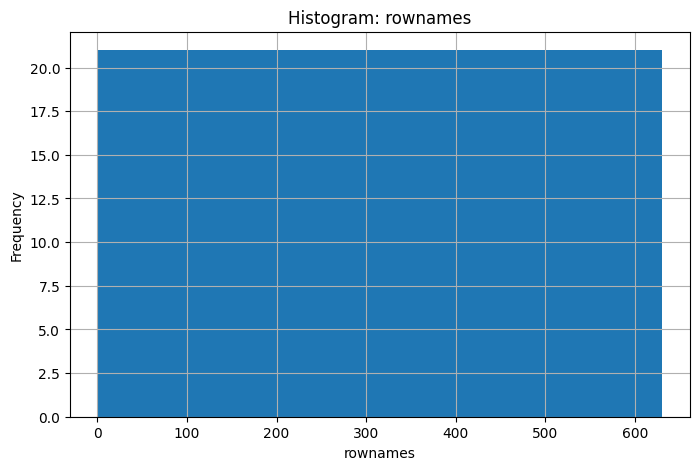

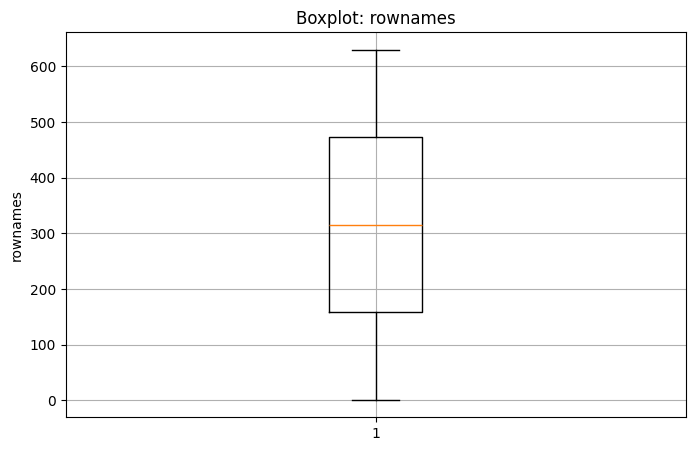

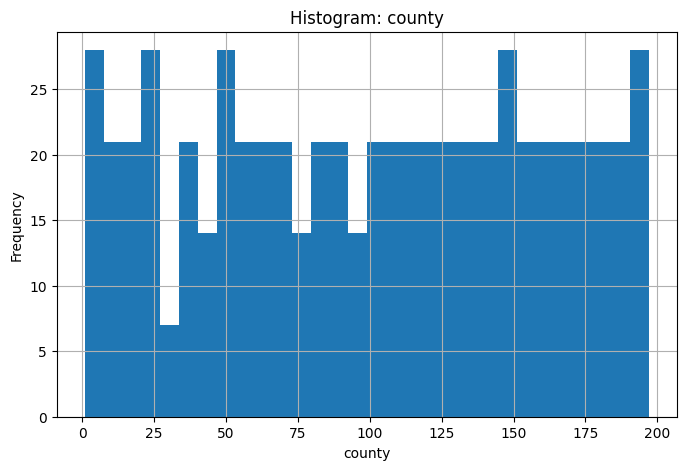

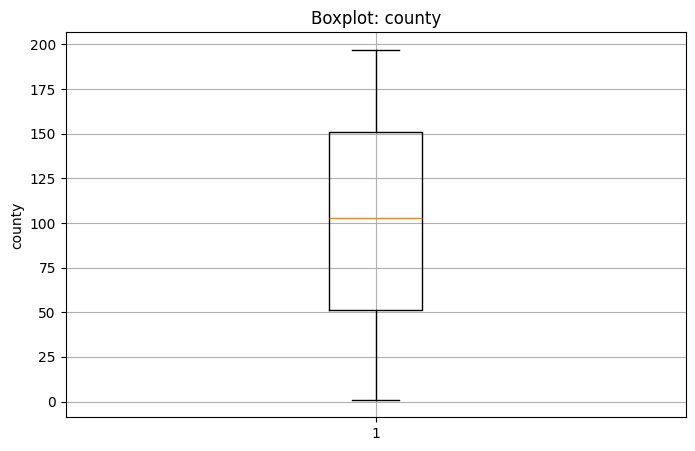

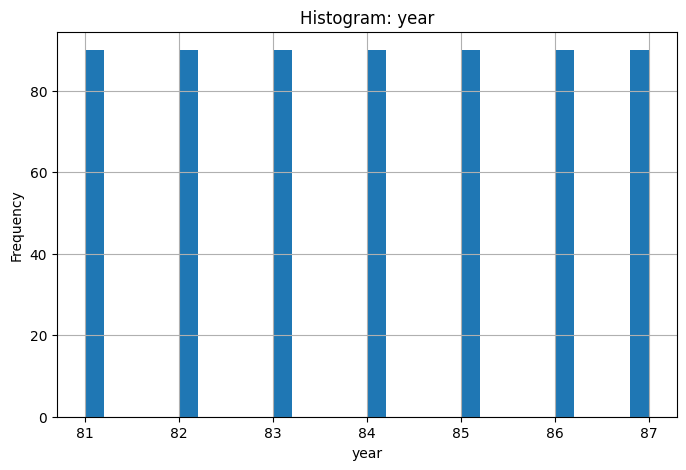

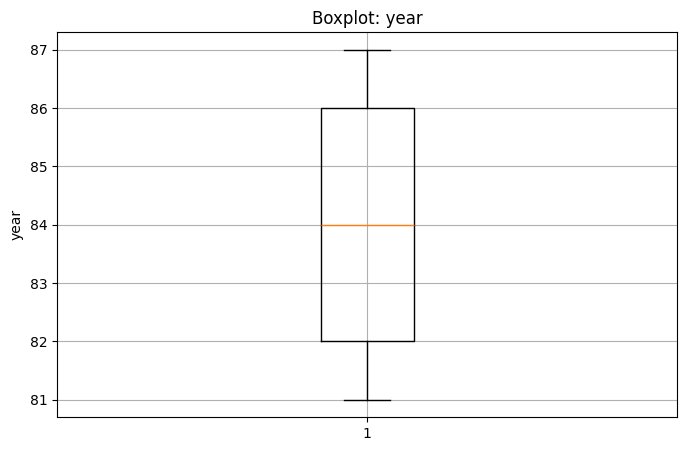

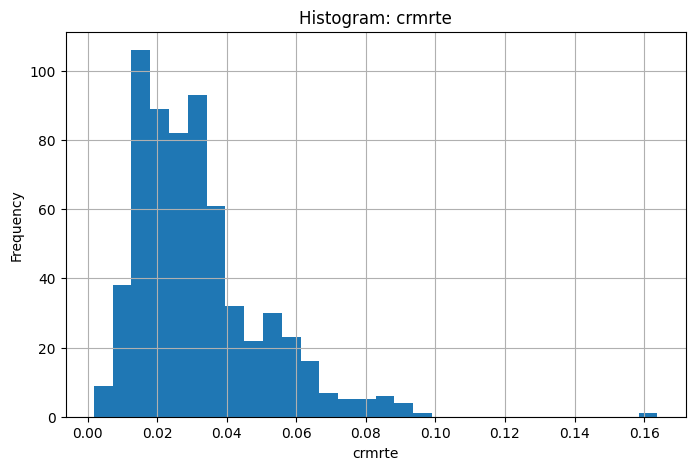

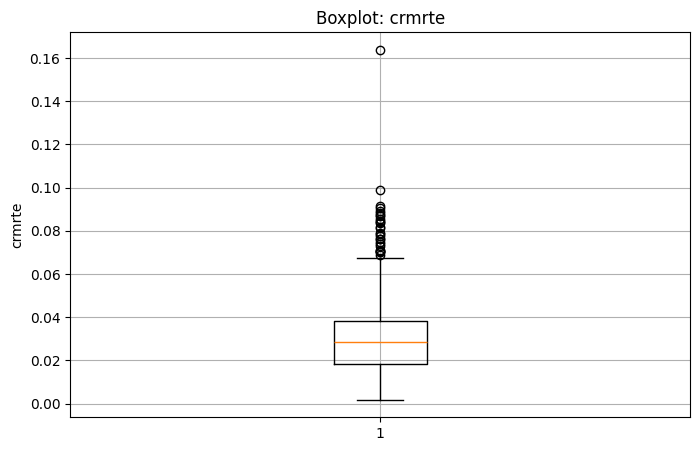

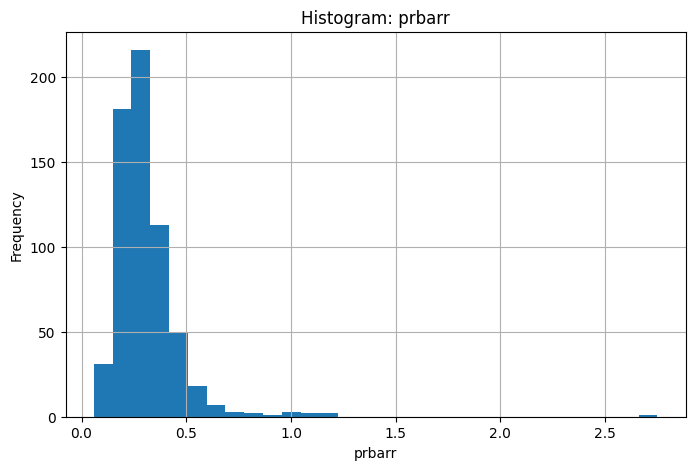

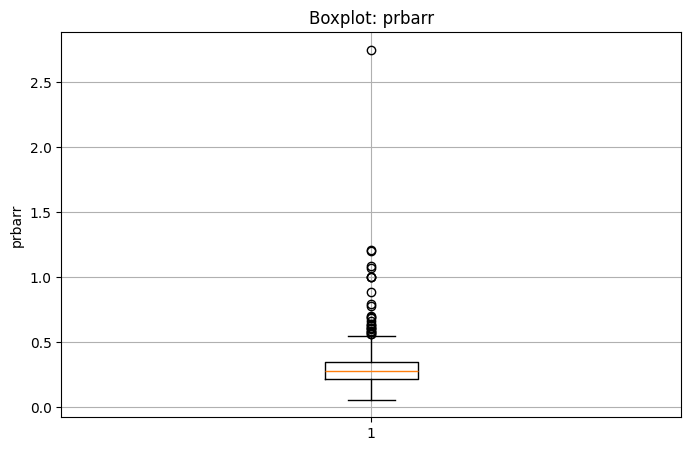

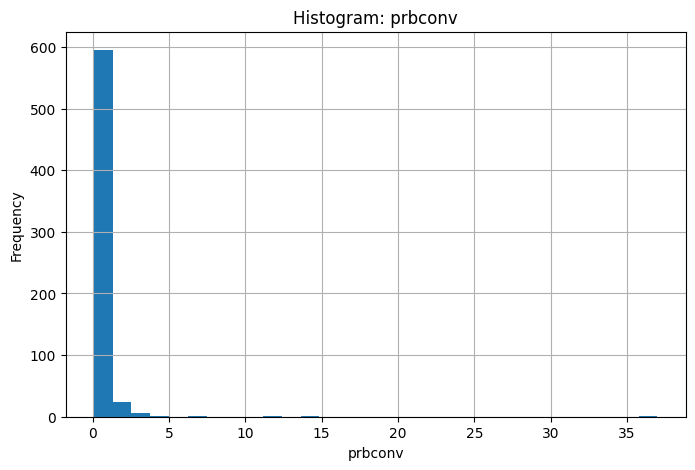

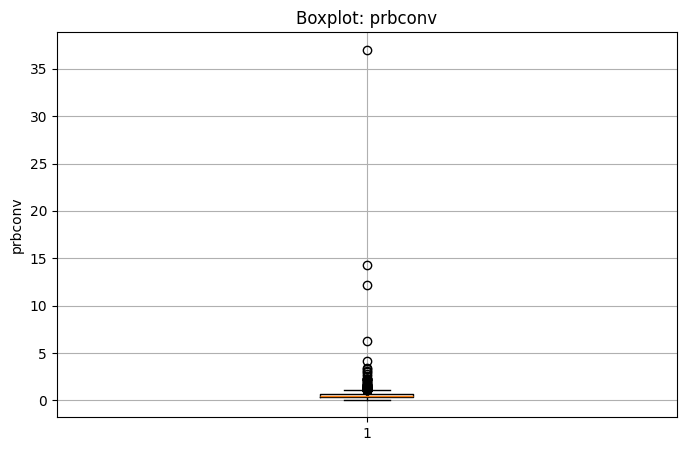

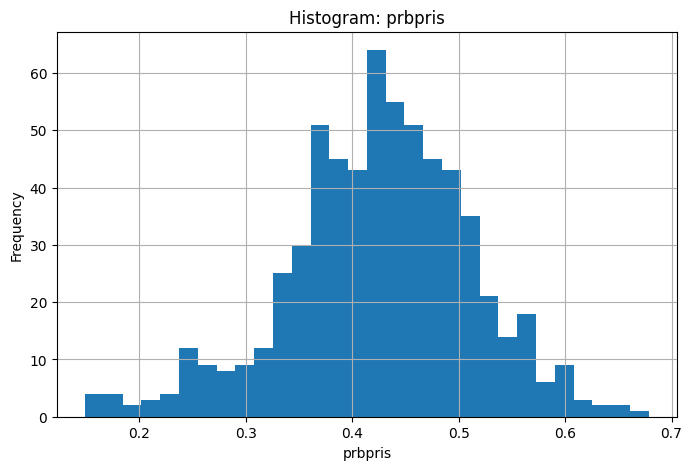

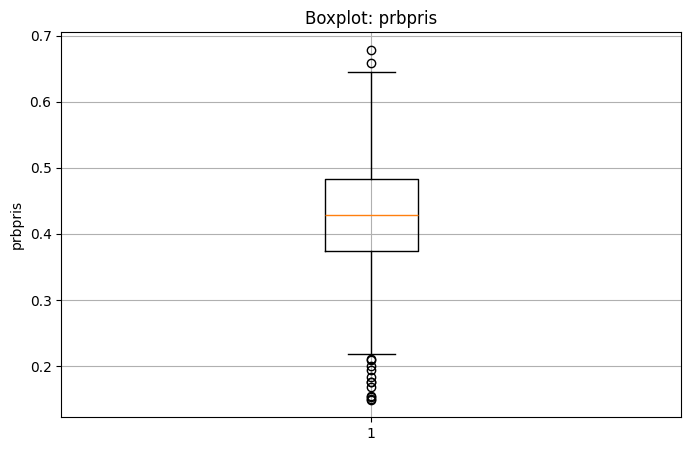

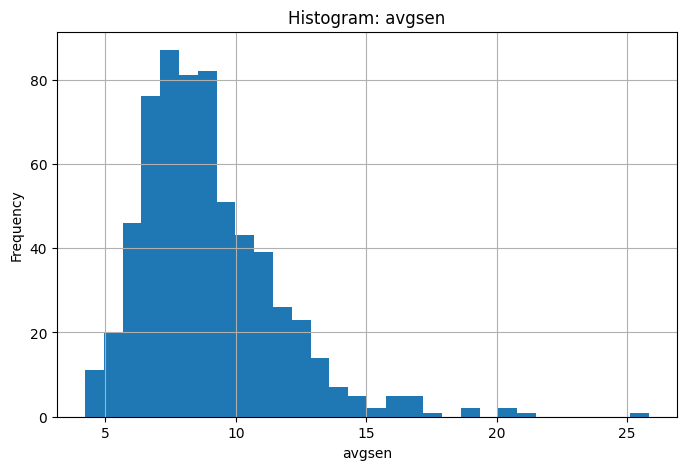

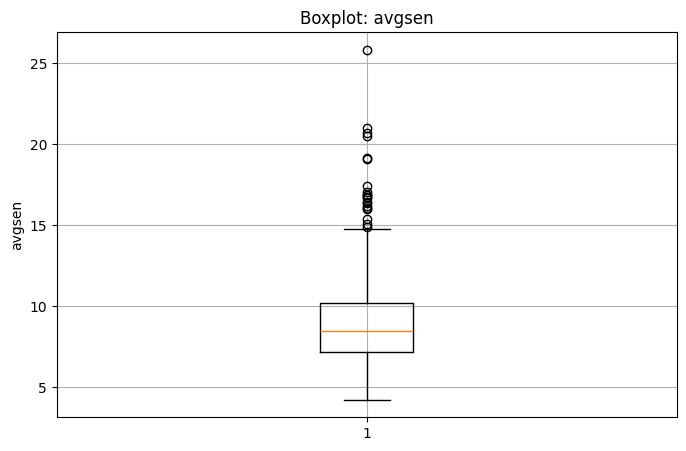

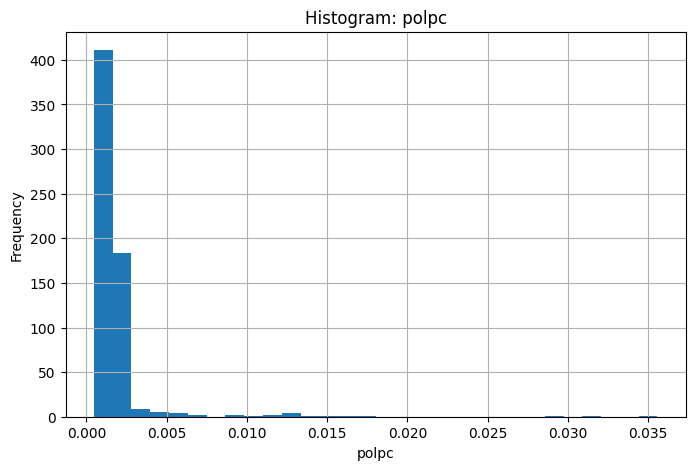

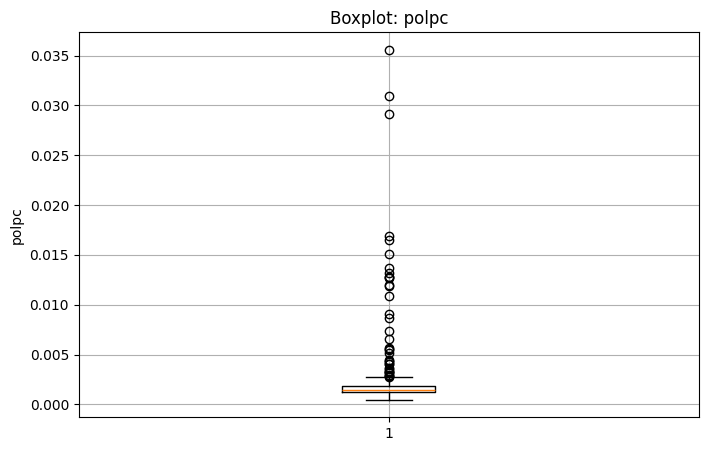

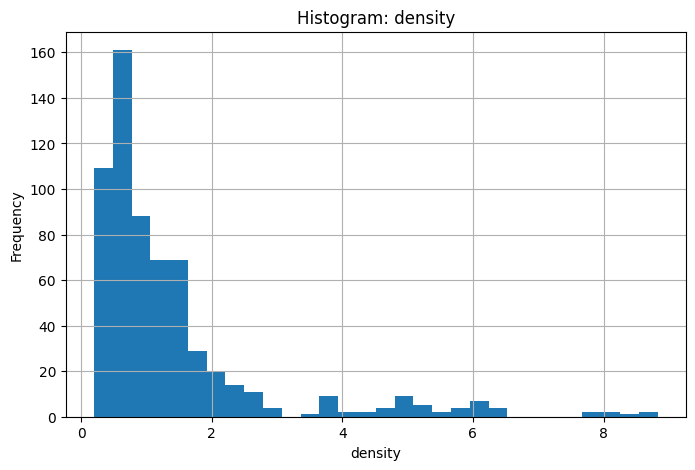

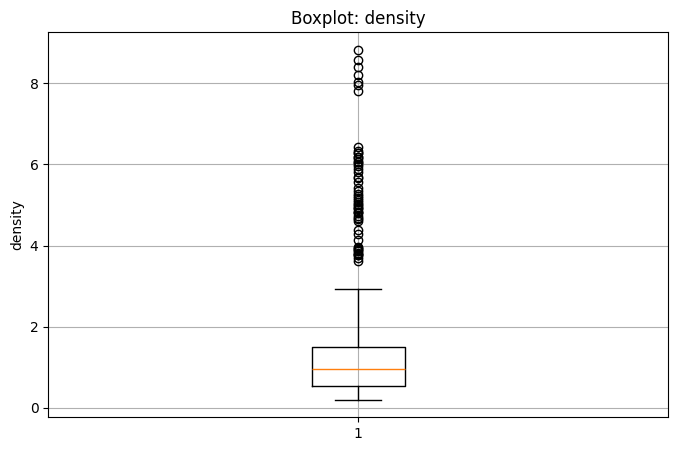

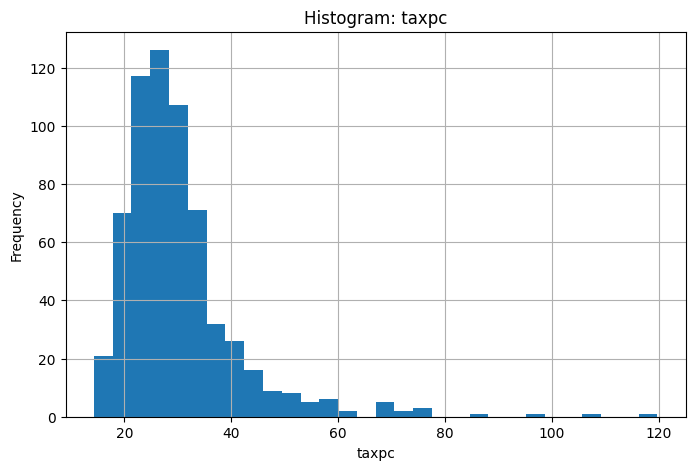

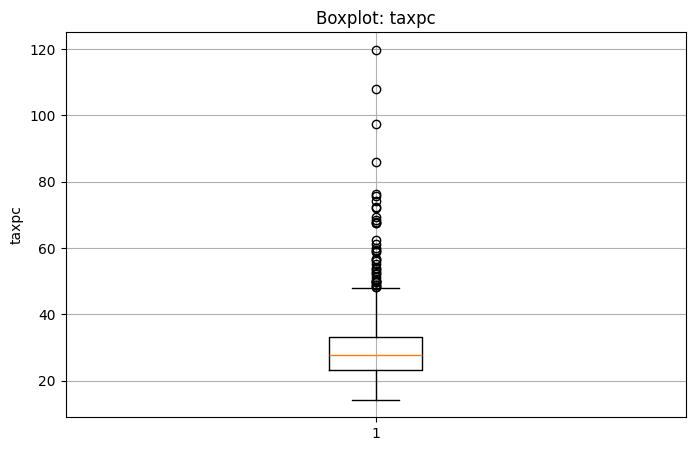

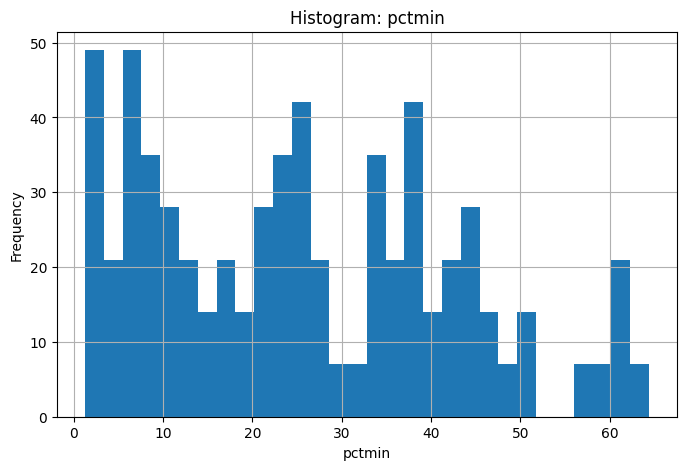

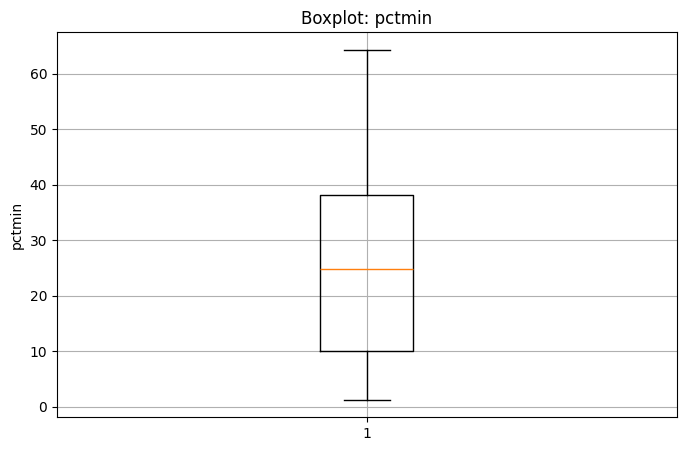

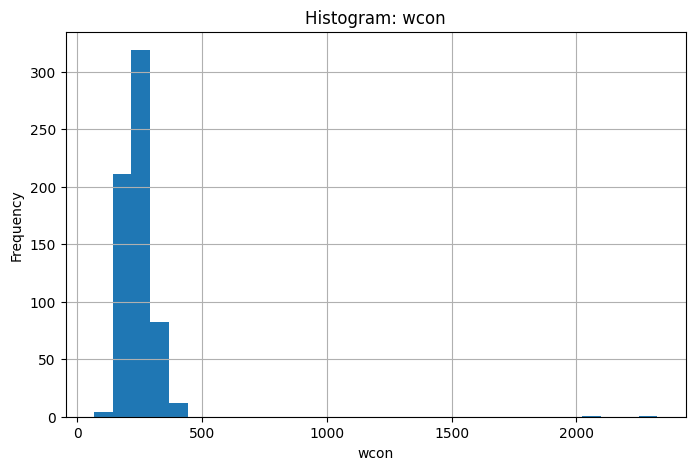

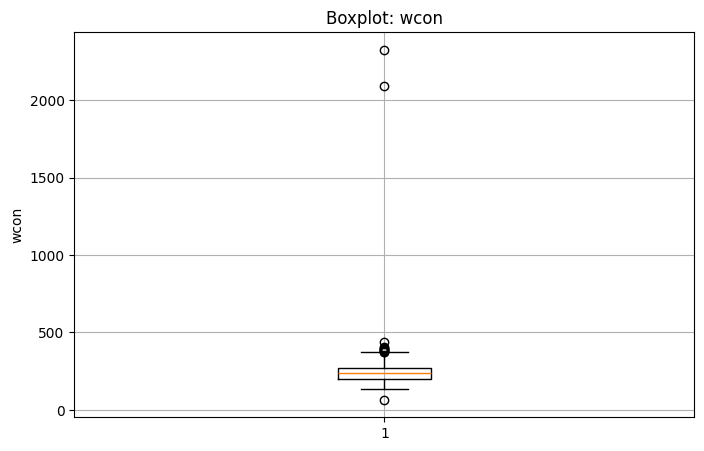

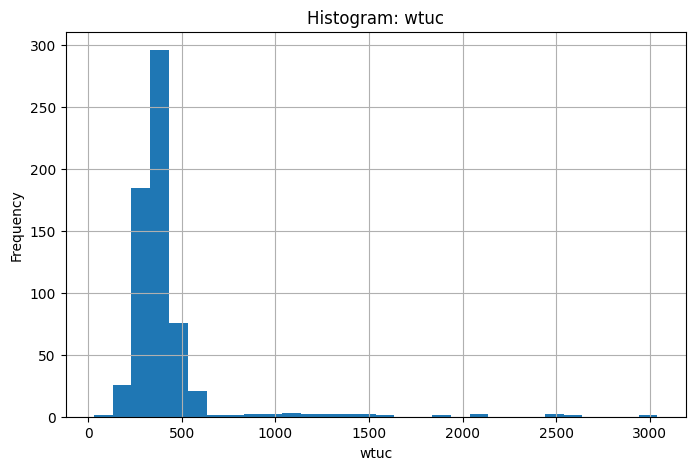

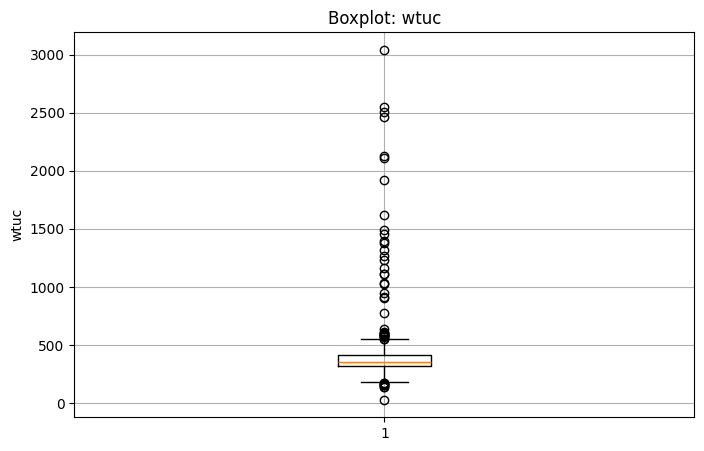

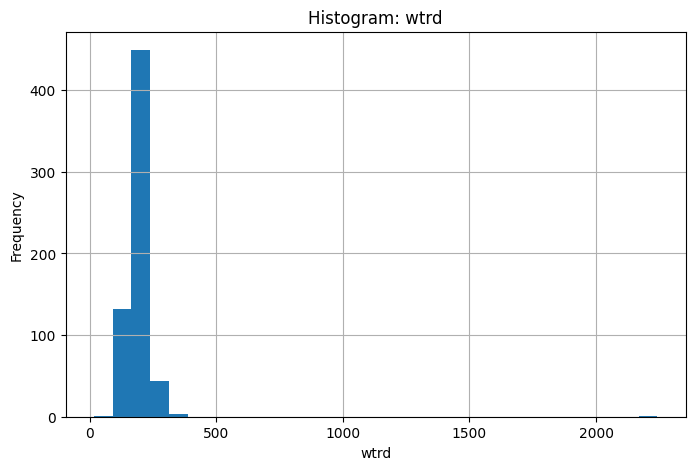

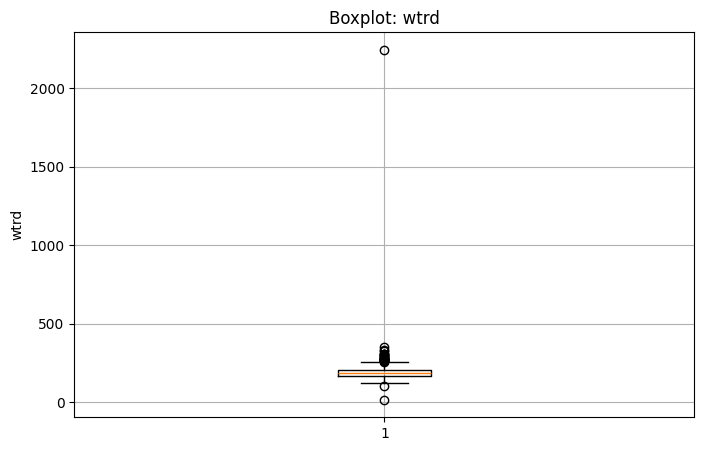

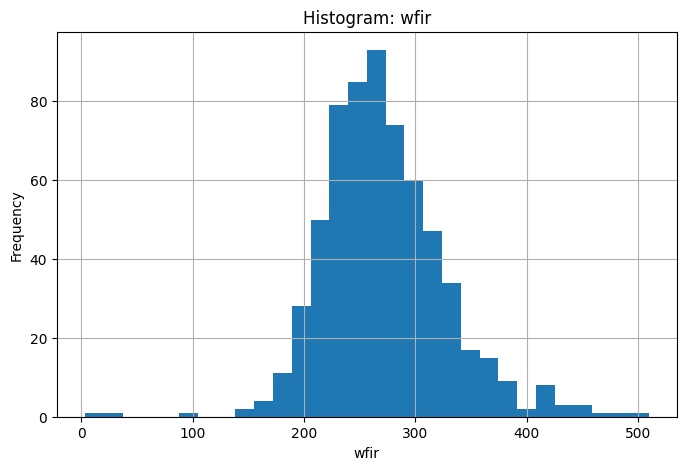

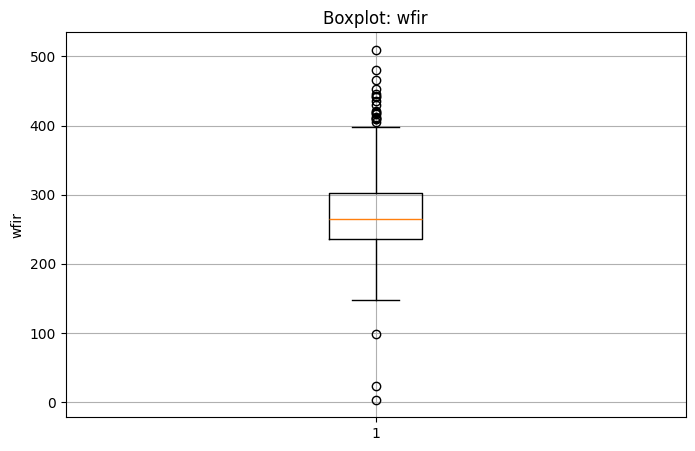

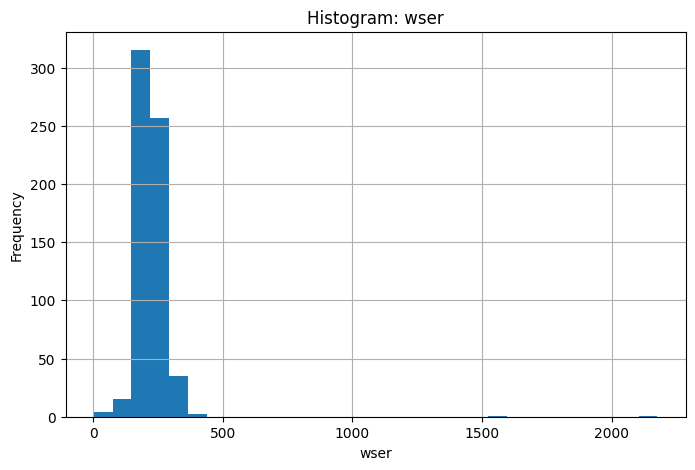

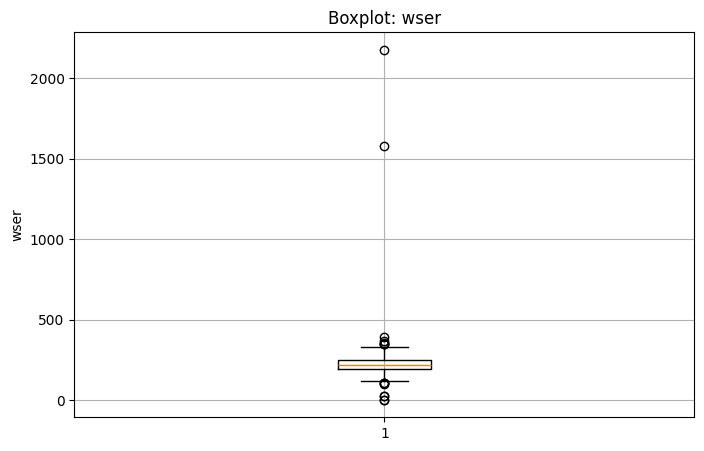

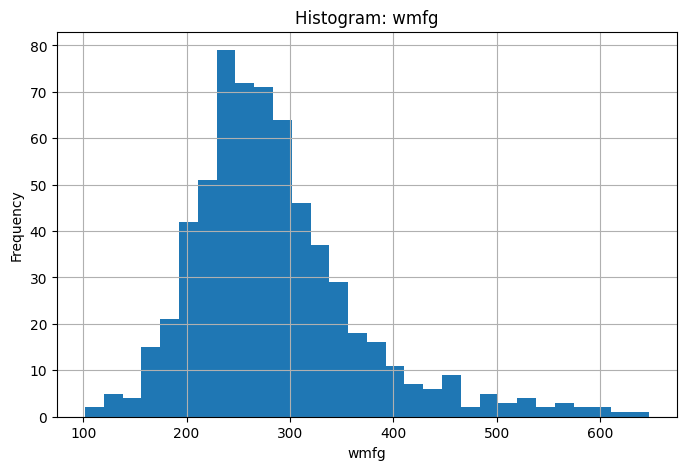

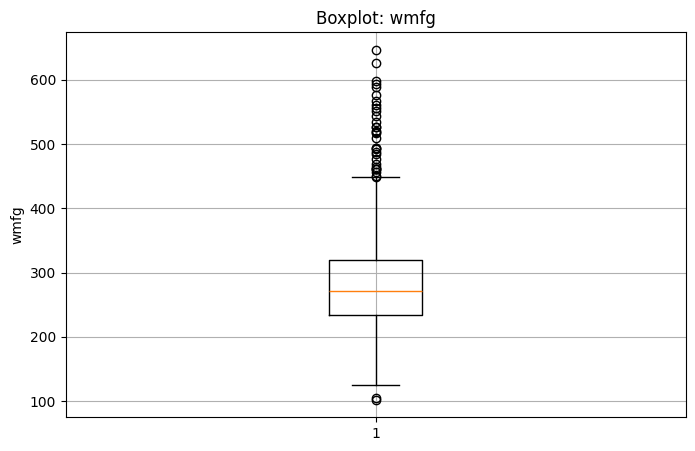

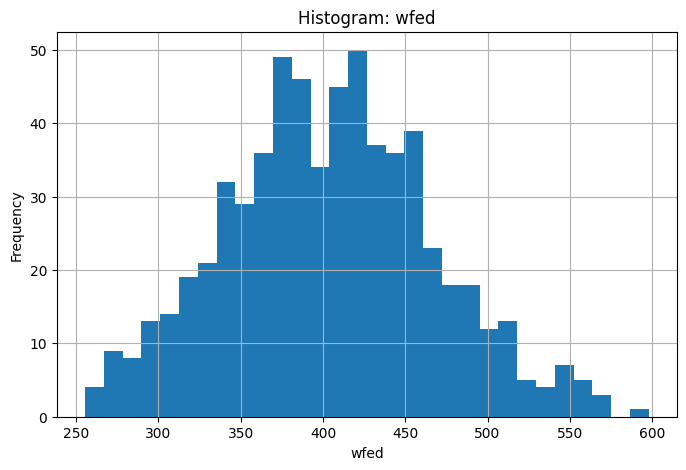

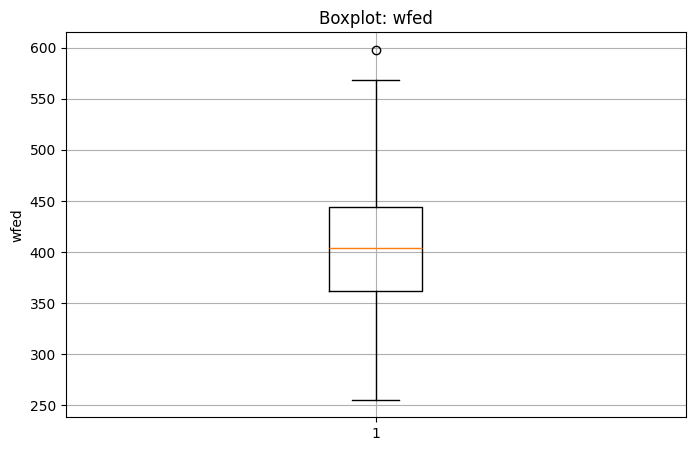

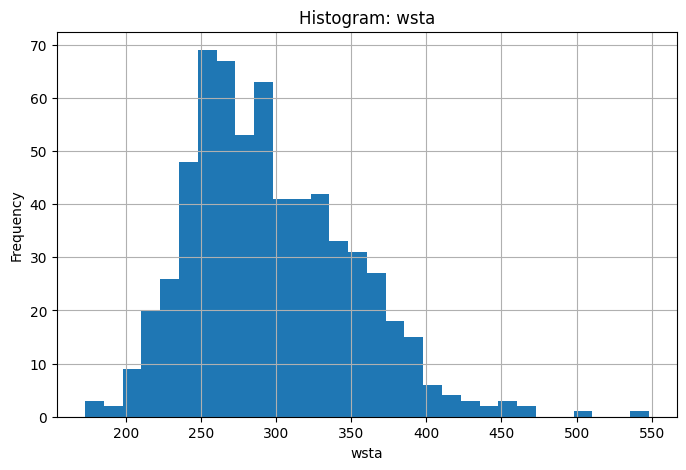

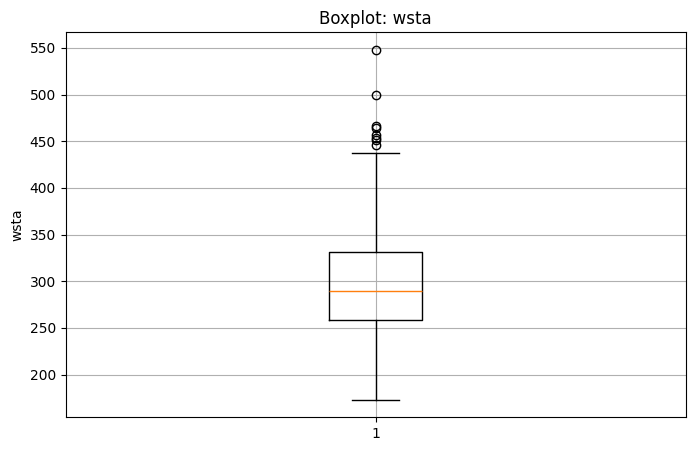

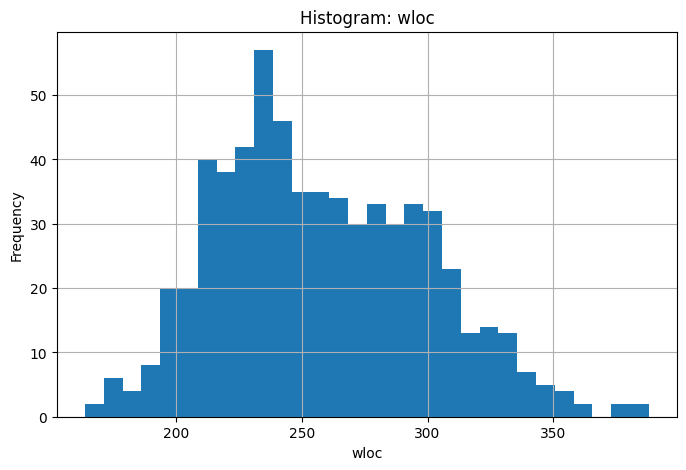

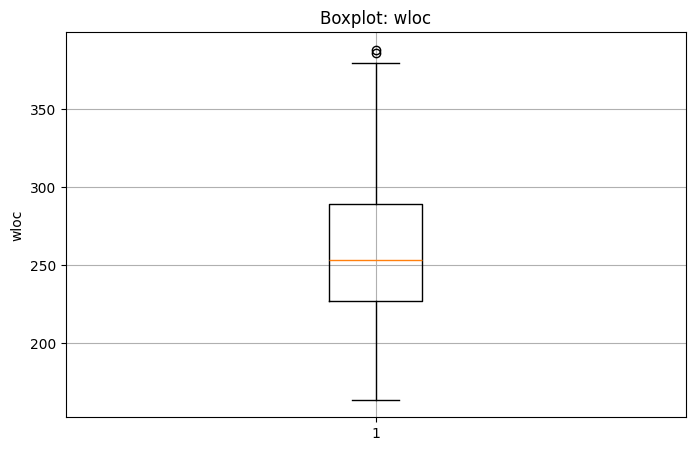

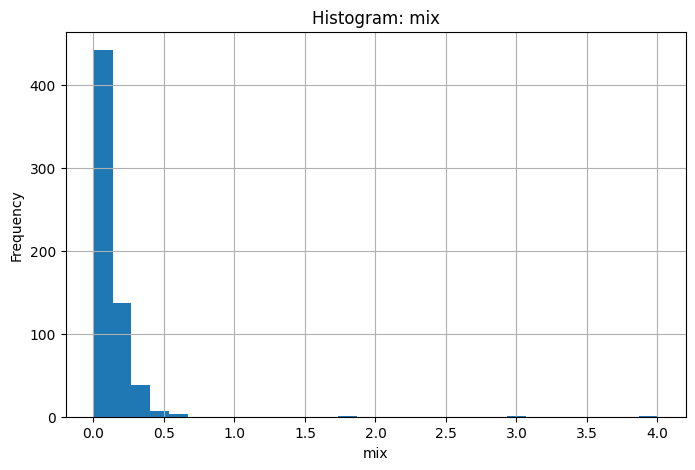

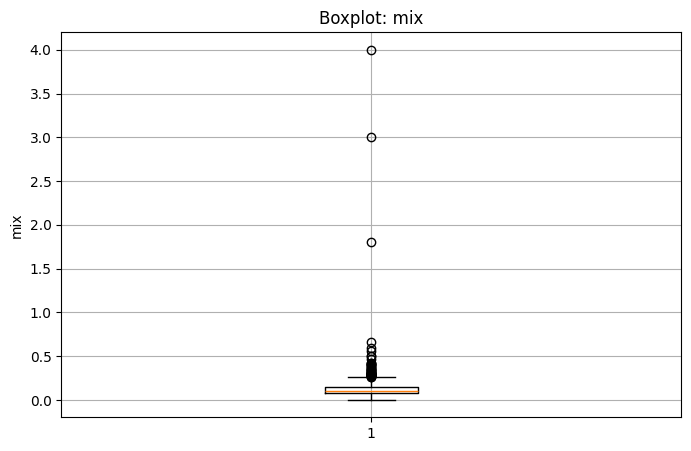

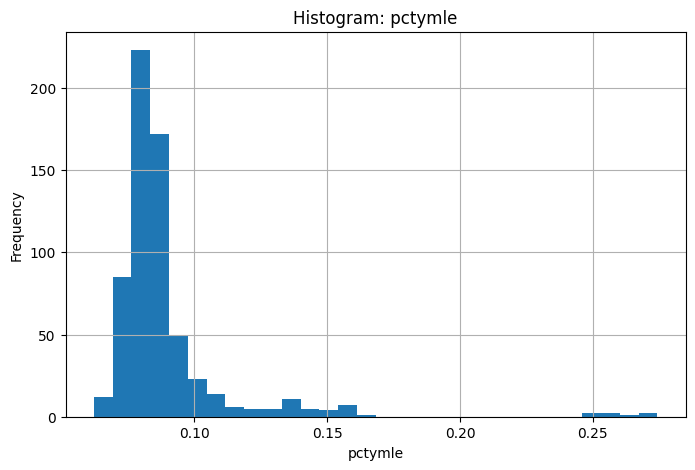

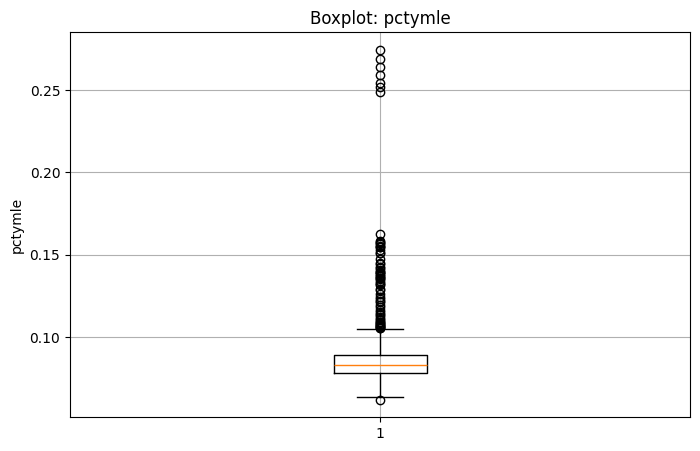

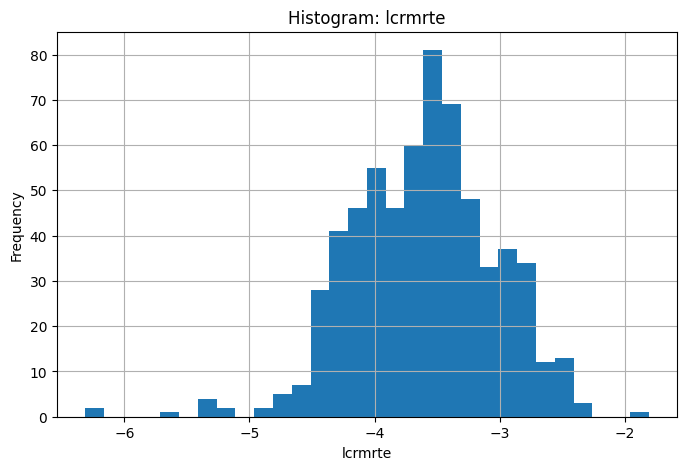

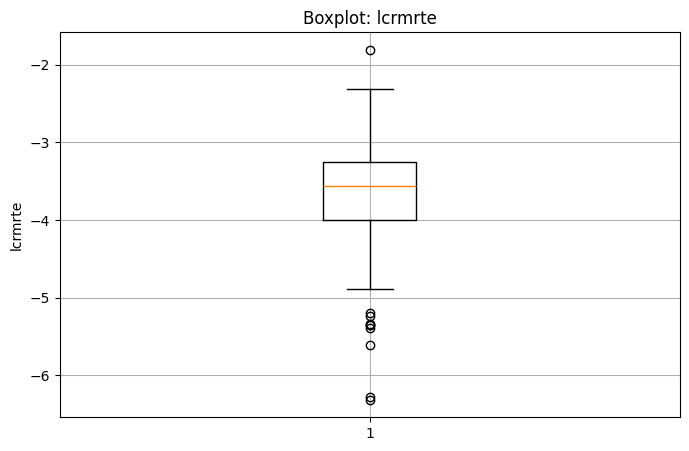

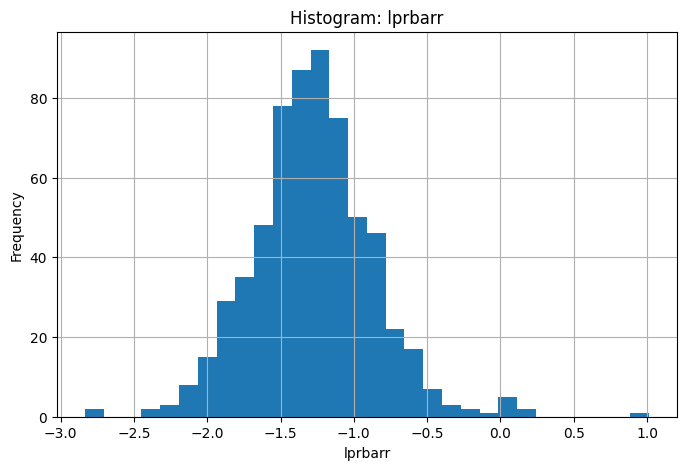

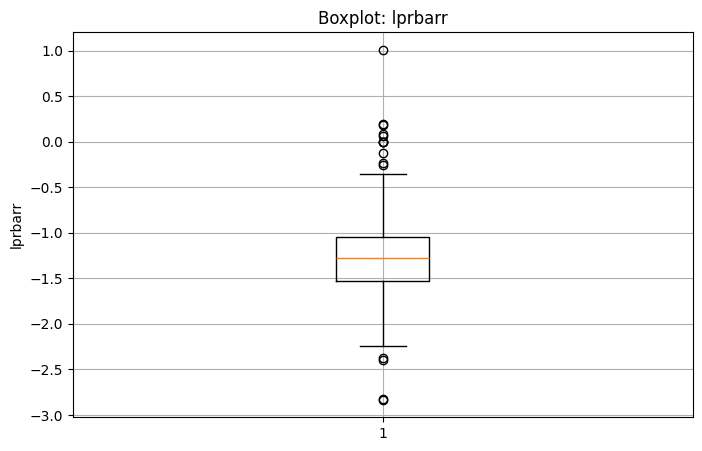

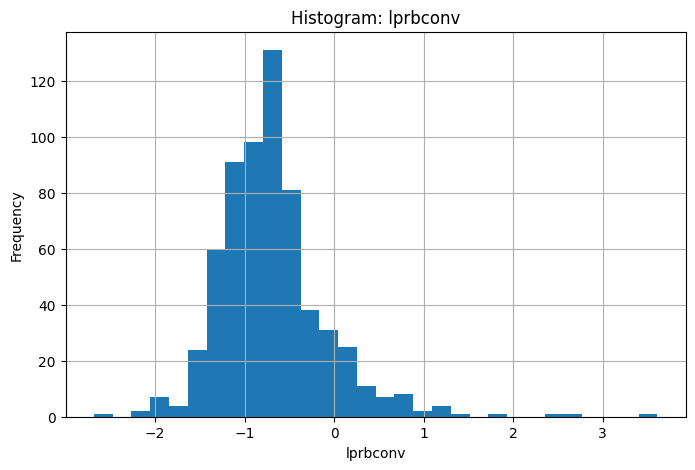

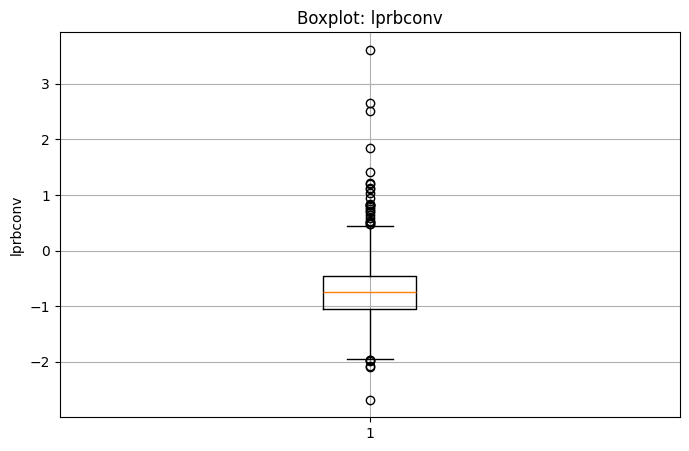

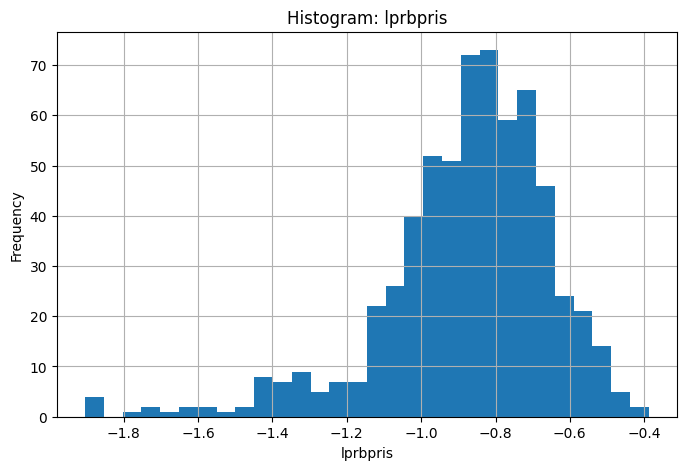

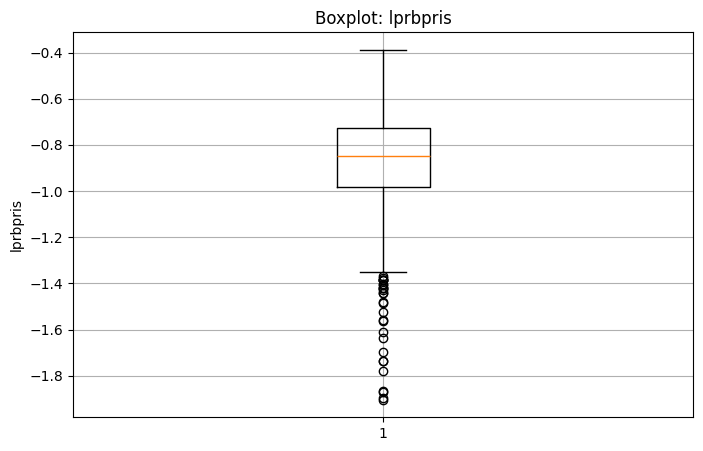

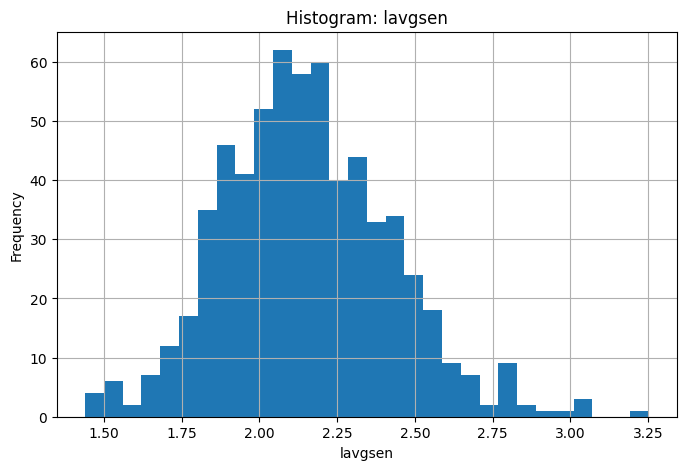

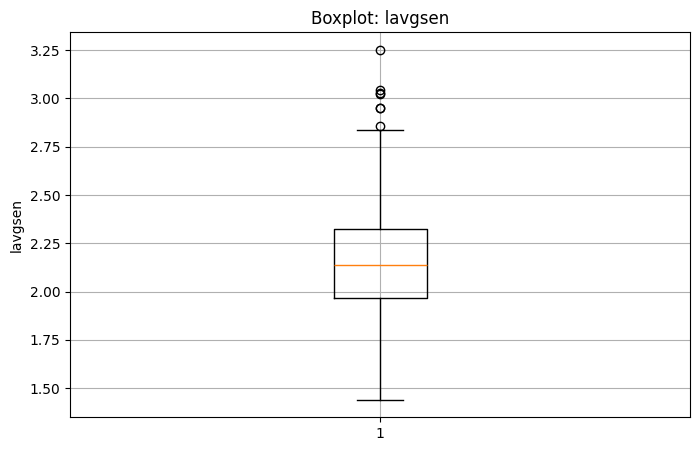

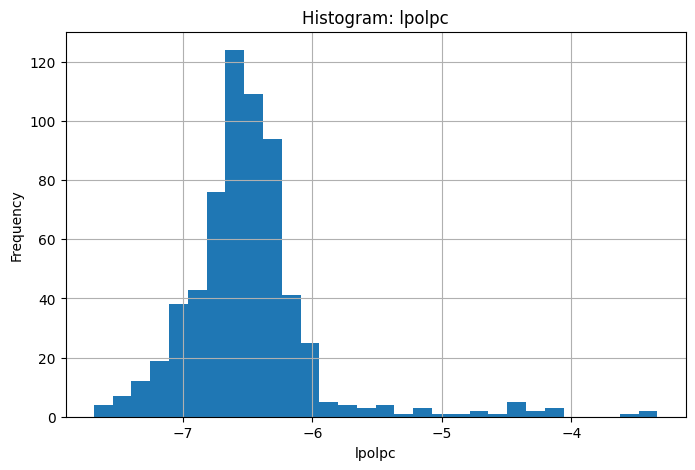

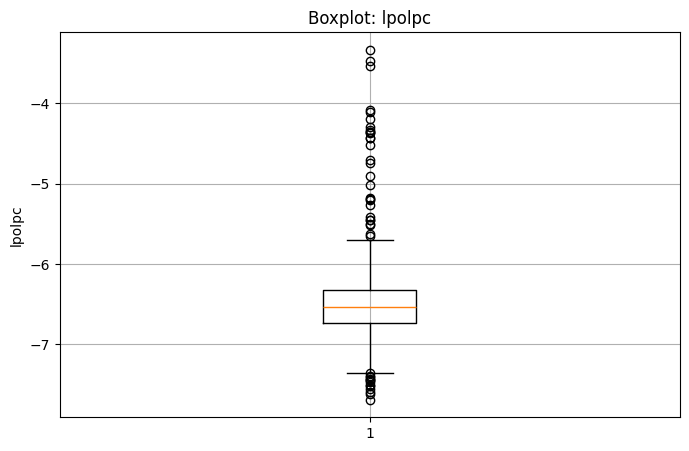

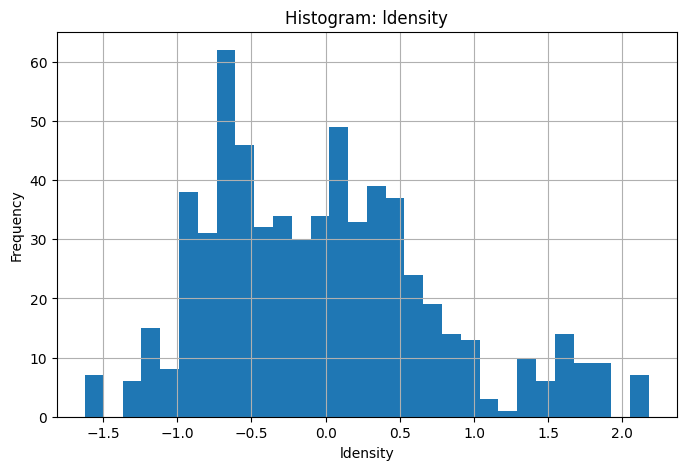

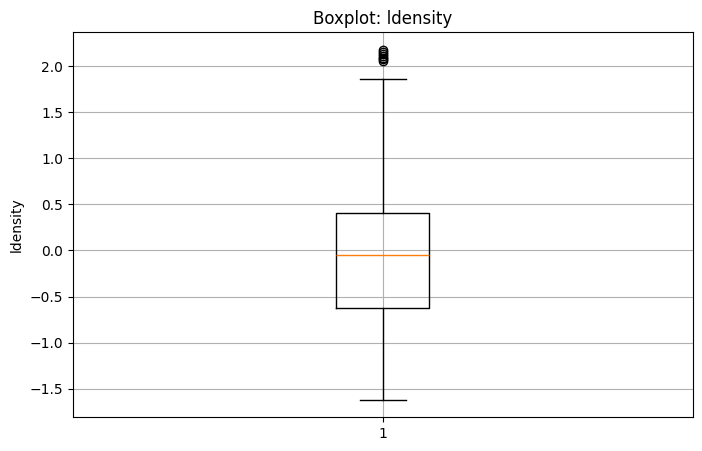

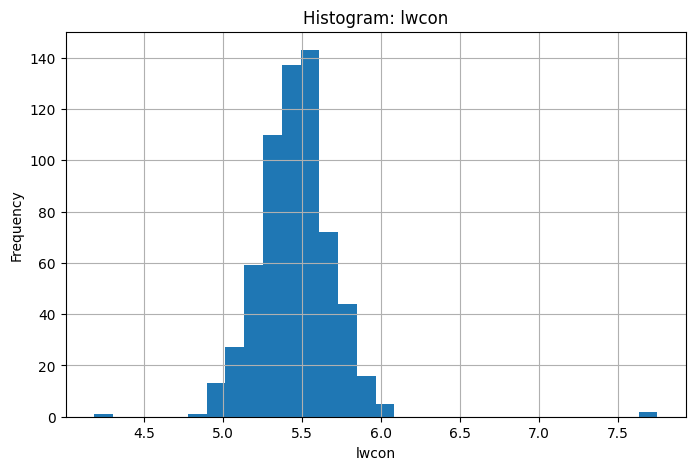

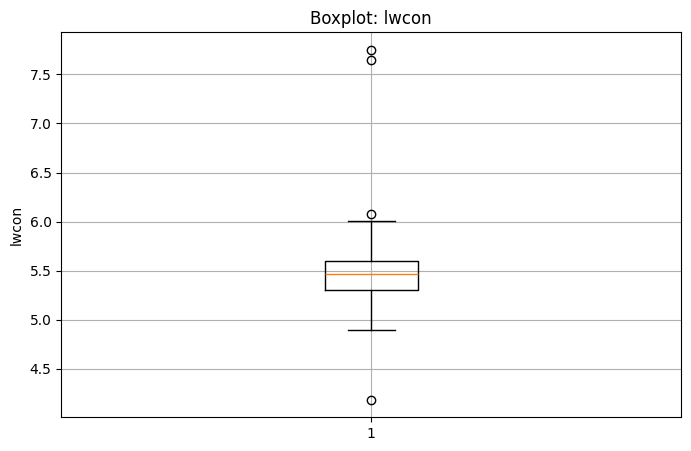

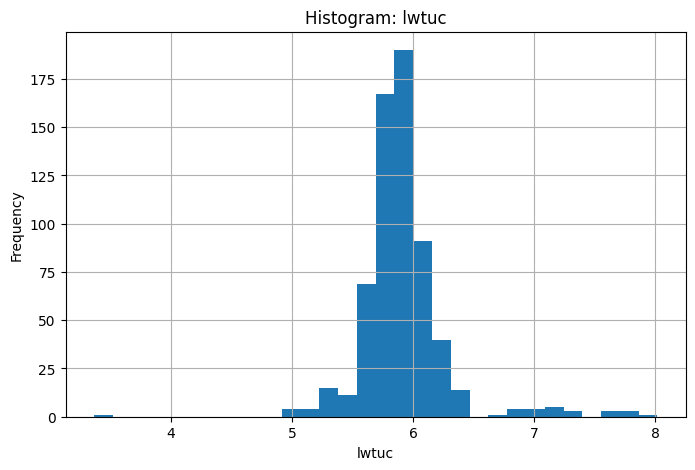

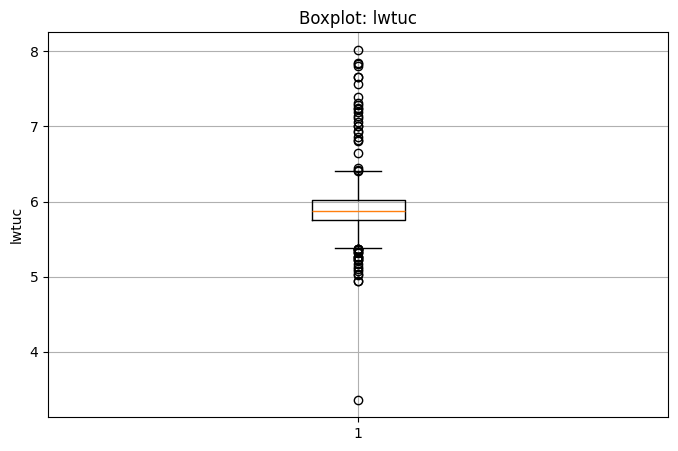

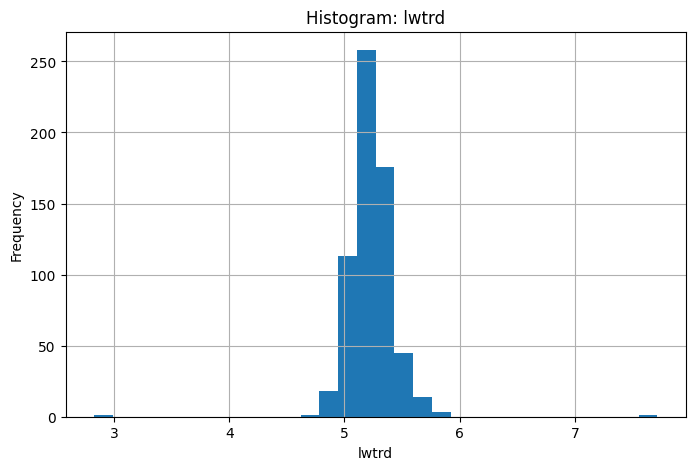

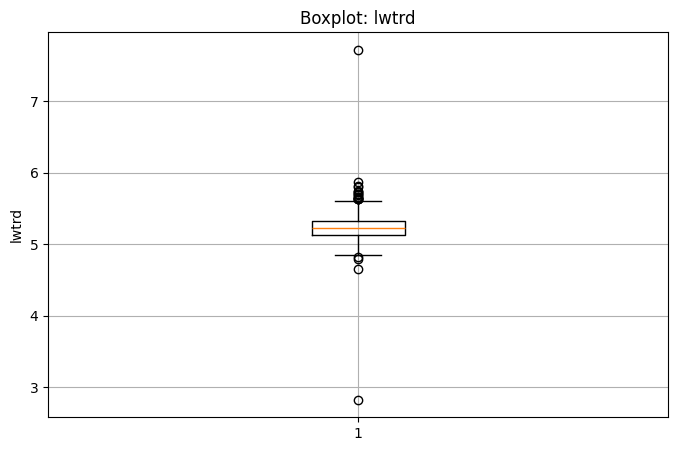

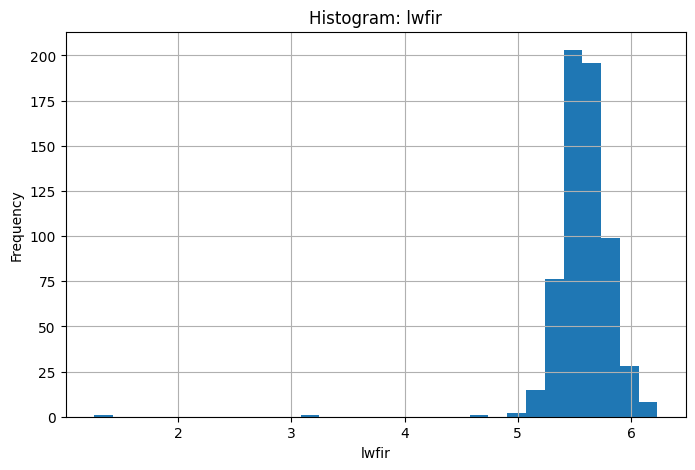

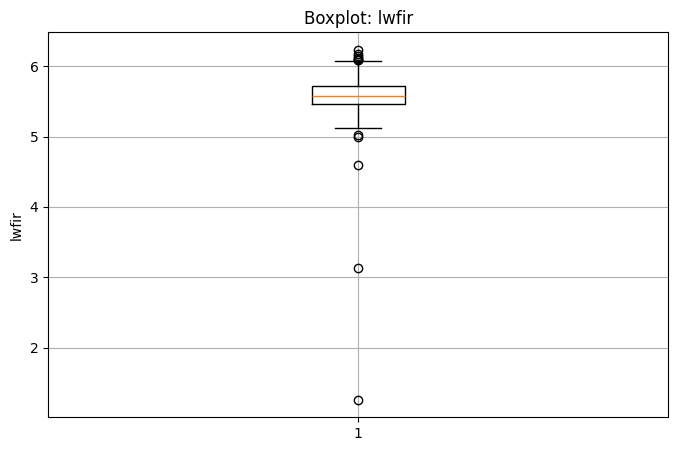

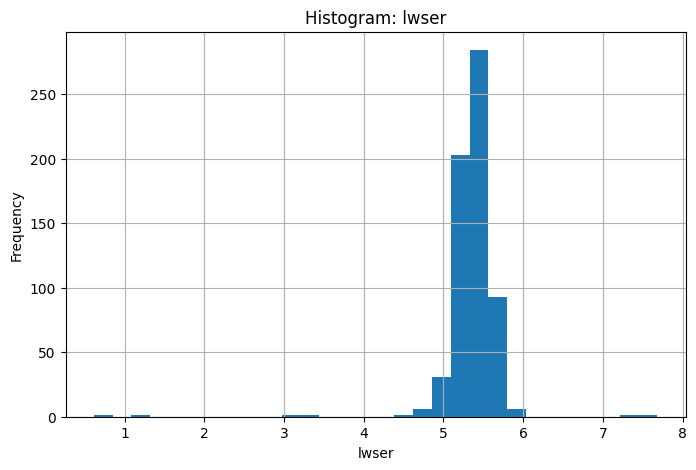

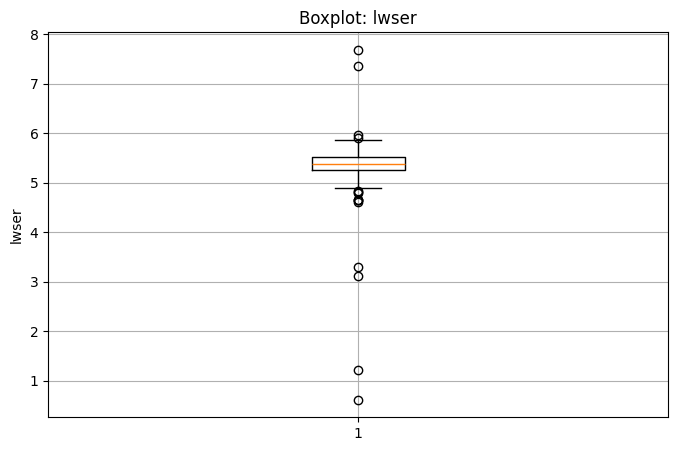

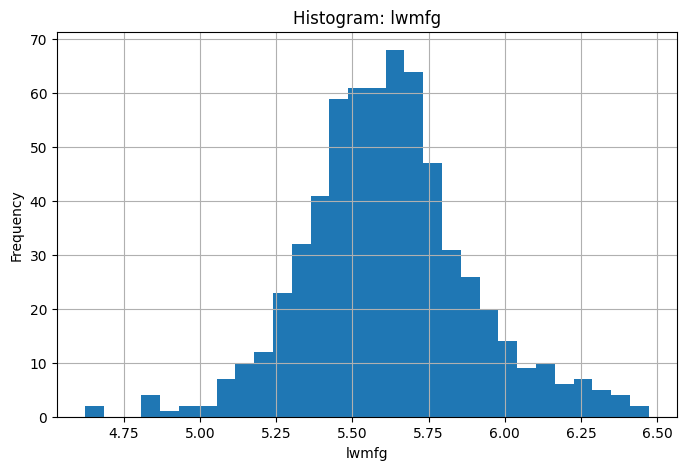

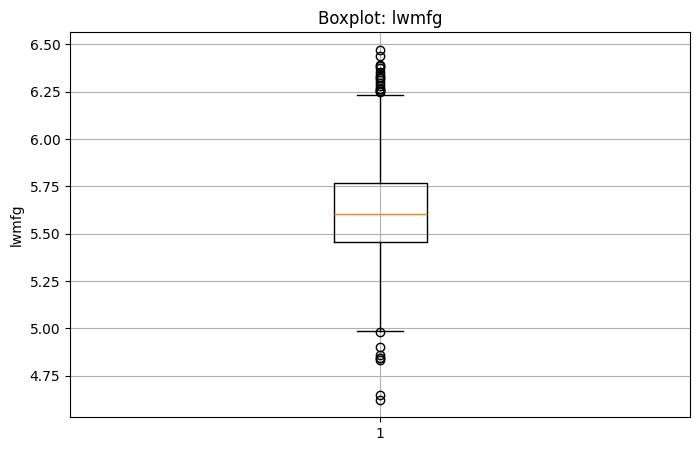

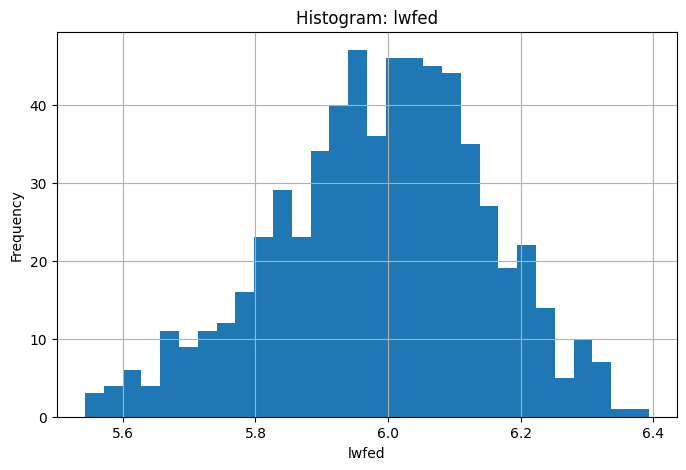

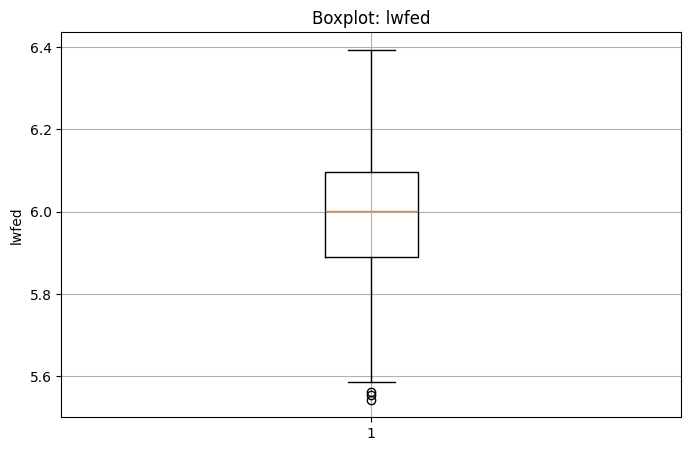

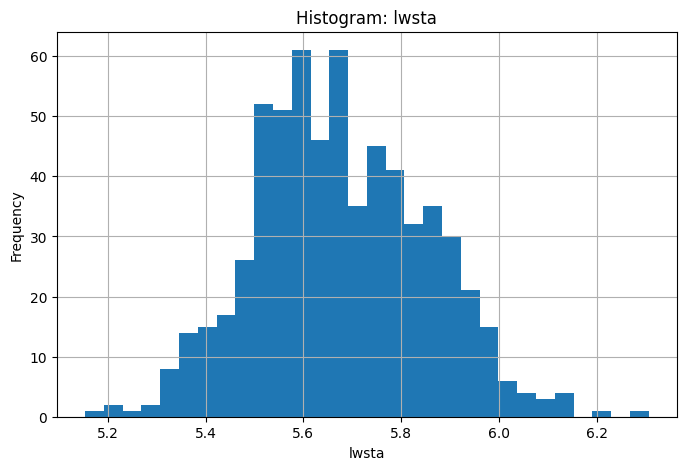

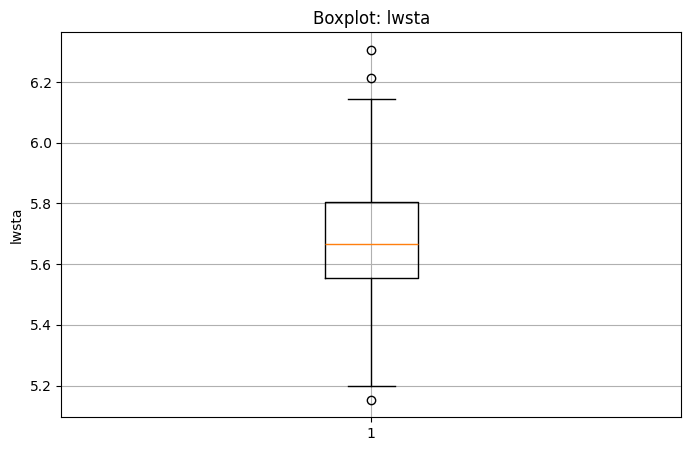

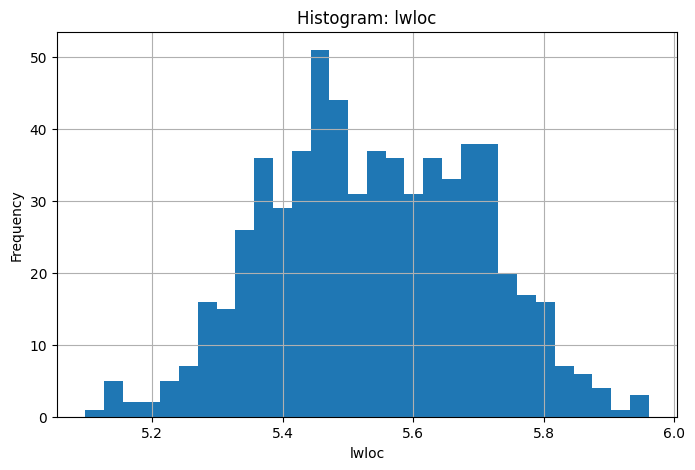

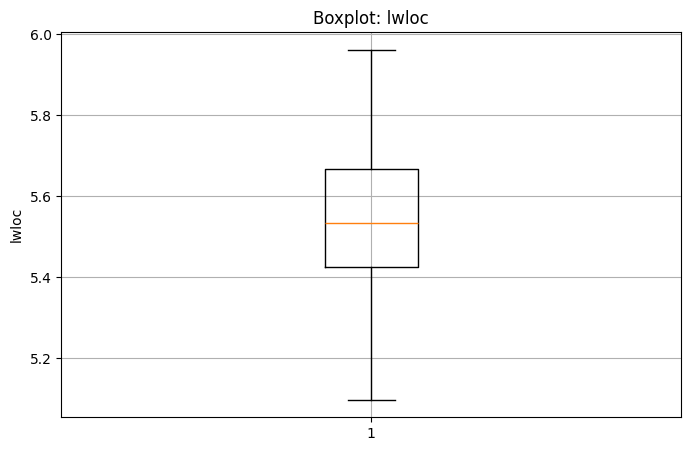

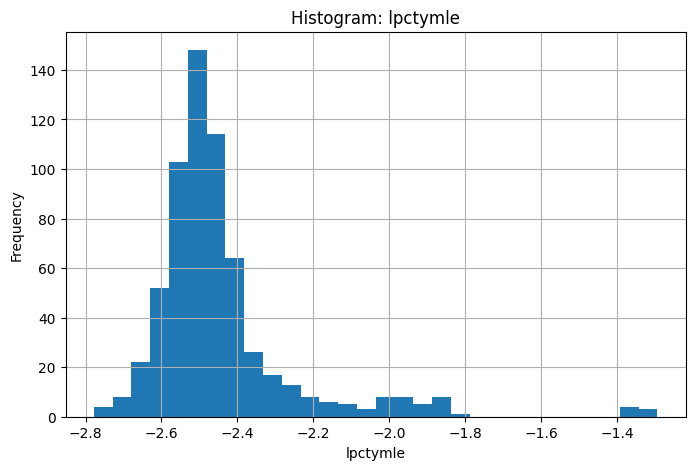

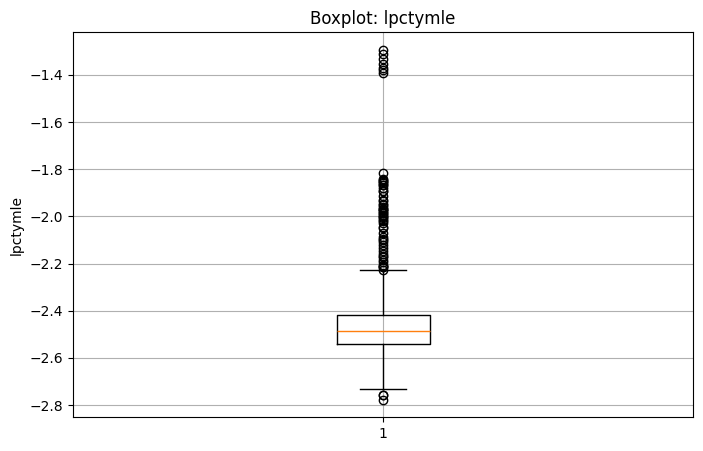

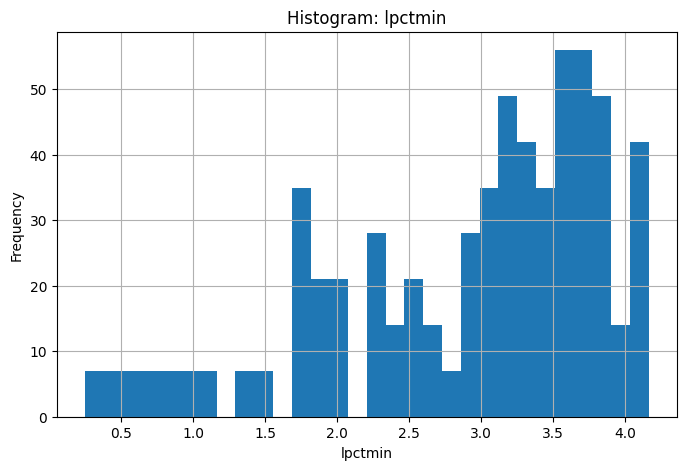

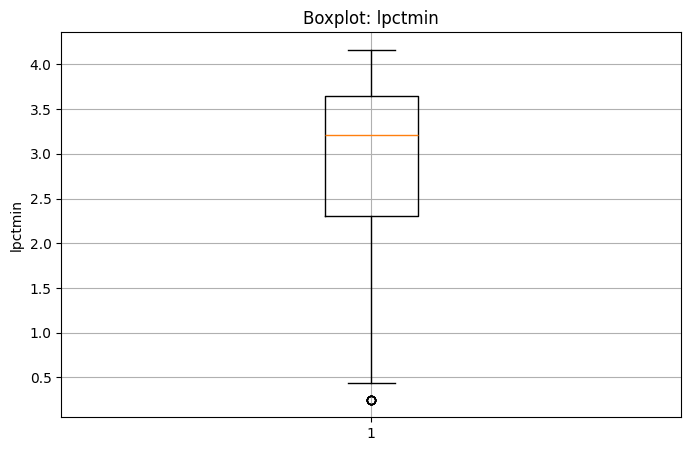

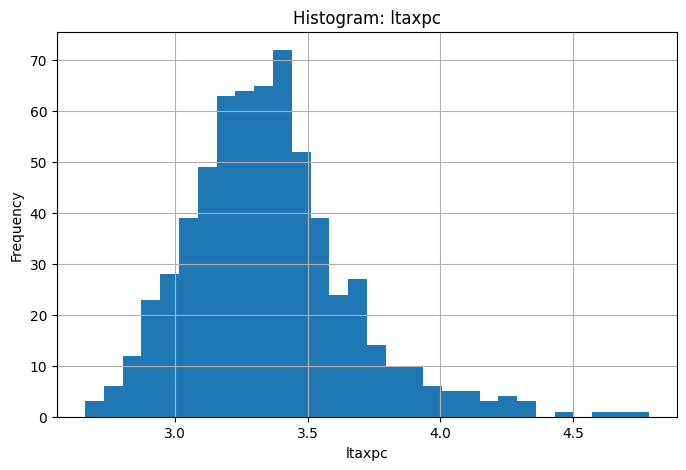

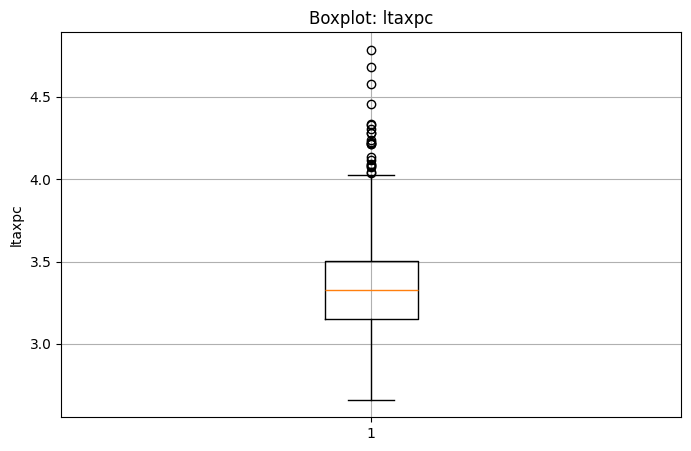

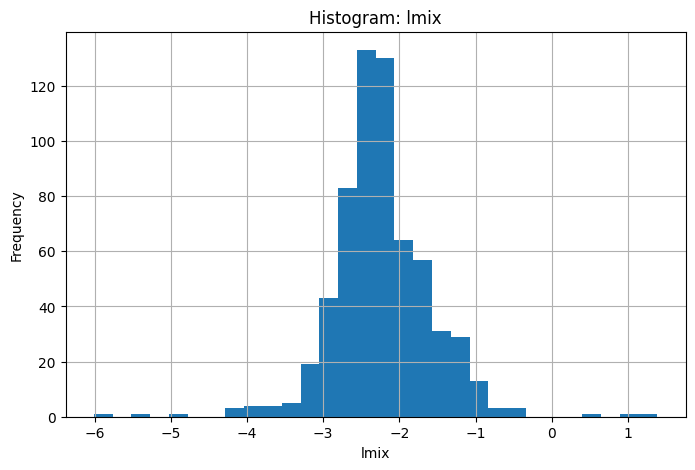

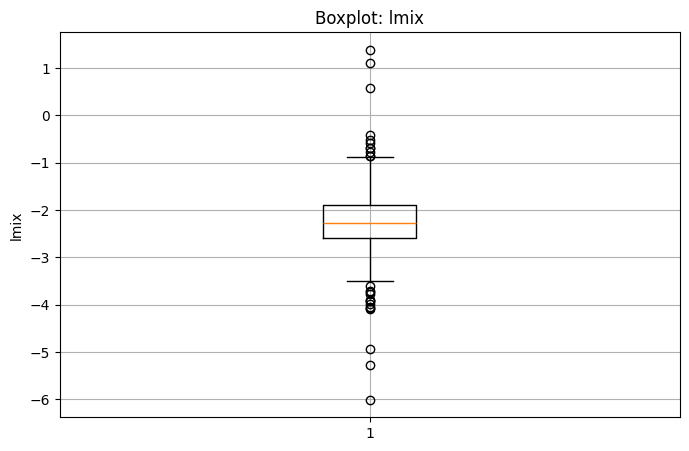

Categorical columns: ['region', 'smsa']


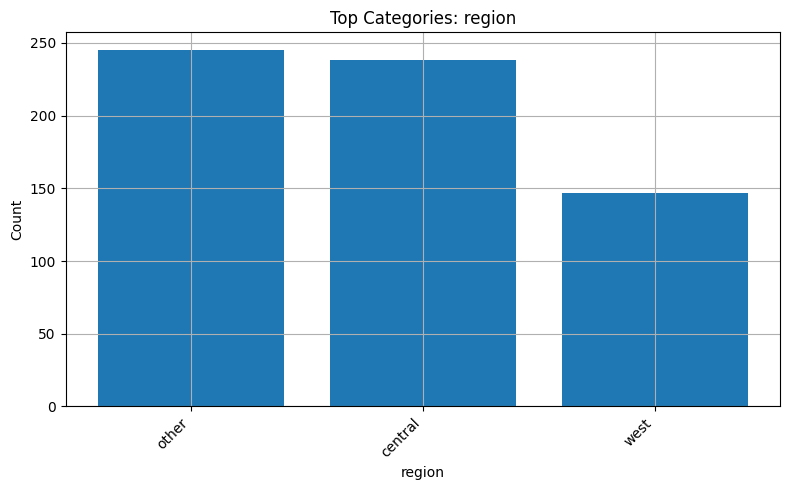

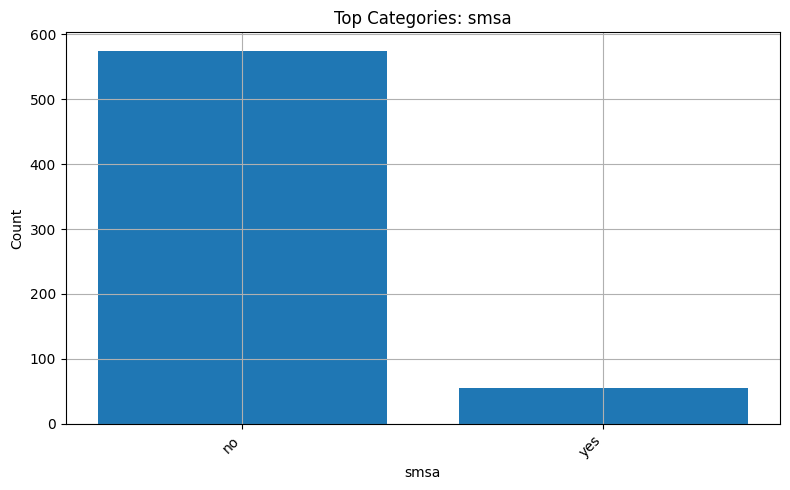

In [53]:

# Numeric columns: hist & boxplot (each in its own figure)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)

for col in num_cols:
    # Histogram
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.show()

# Categorical columns: bar chart of top categories
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    vc = df[col].value_counts().head(15)
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"Top Categories: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


#6. Bivariate Analysis

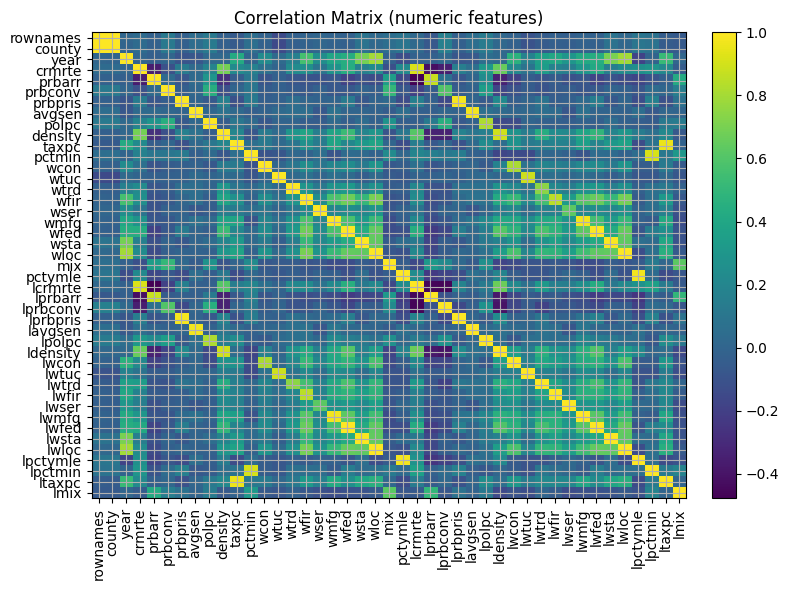

Top correlated numeric pairs (abs):


,,0
county,rownames,0.999480
wloc,lwloc,0.995340
lwfed,wfed,0.994538
lwsta,wsta,0.992558
lprbpris,prbpris,0.981568


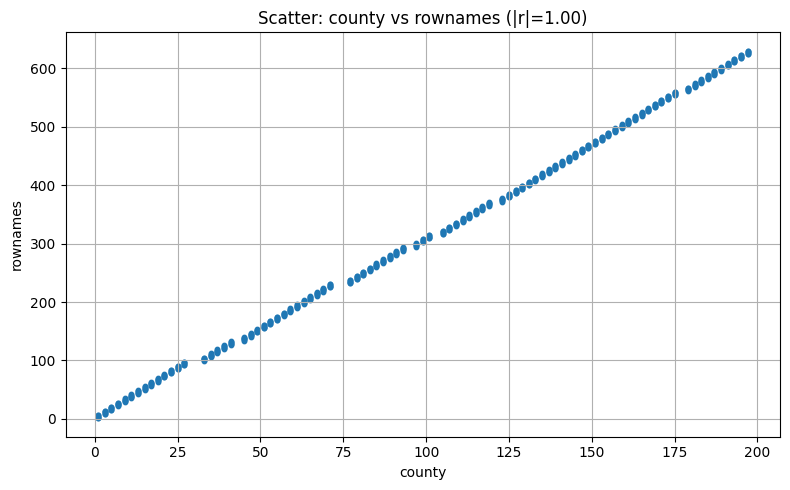

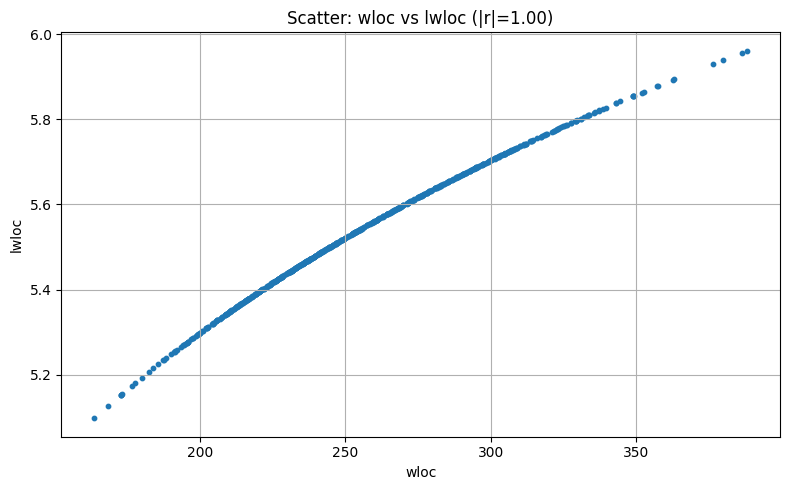

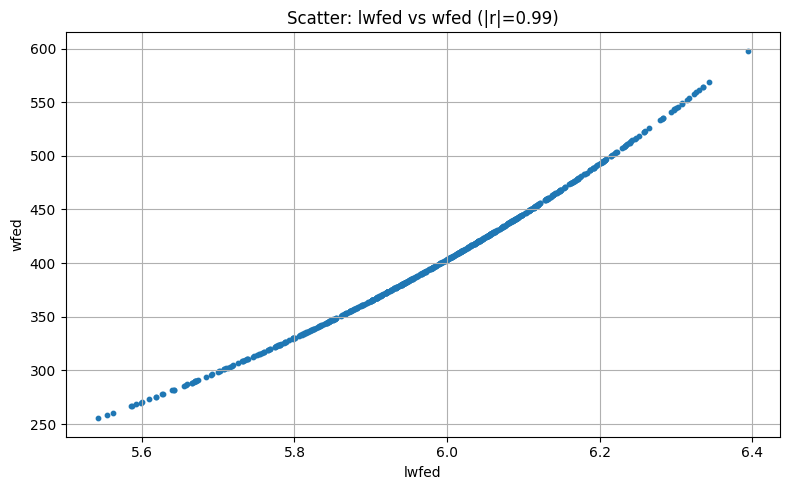

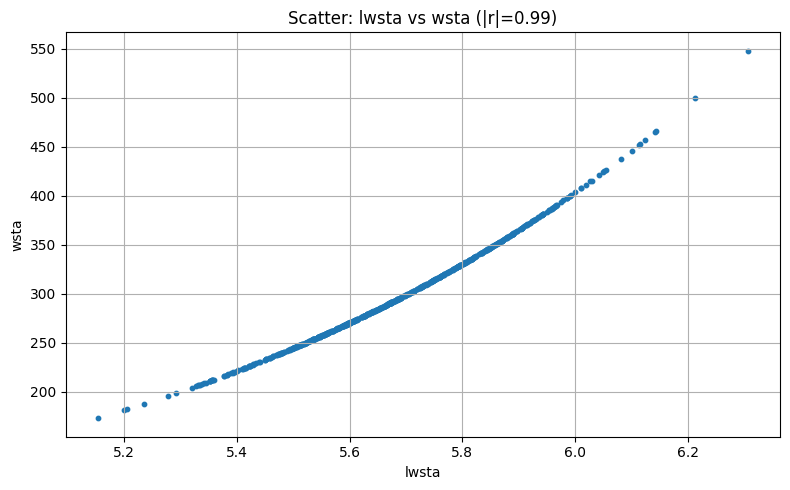

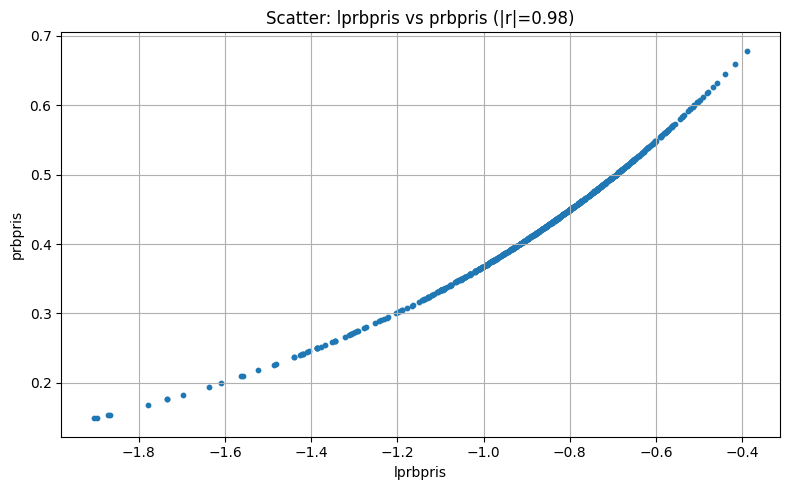

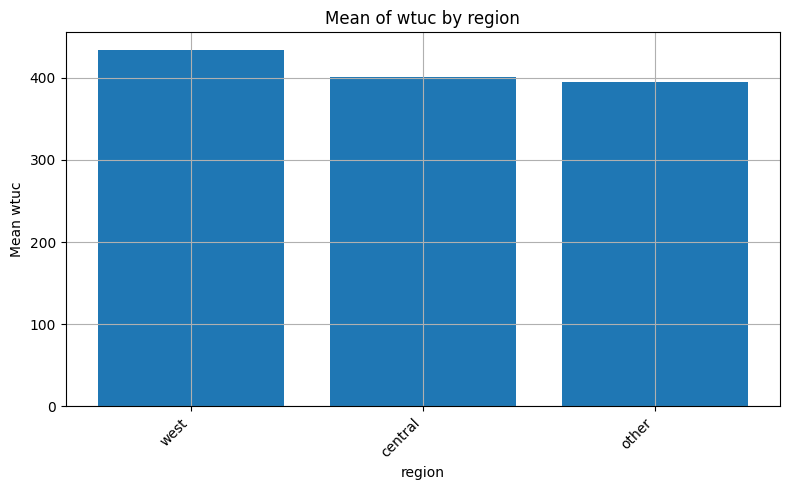

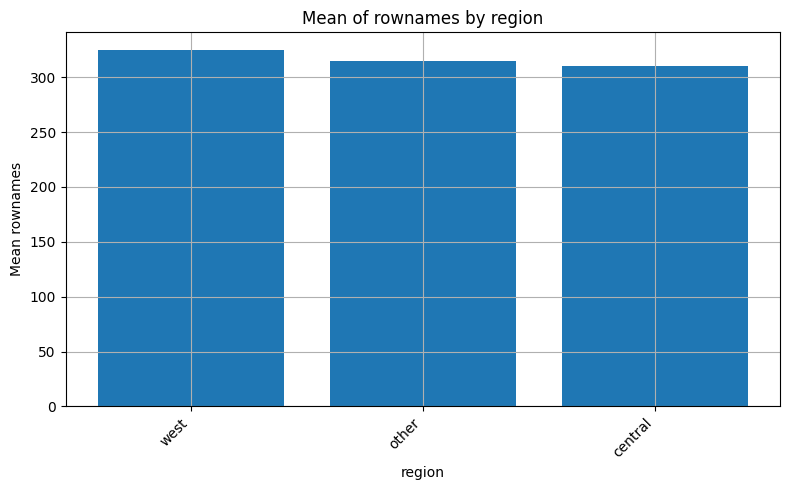

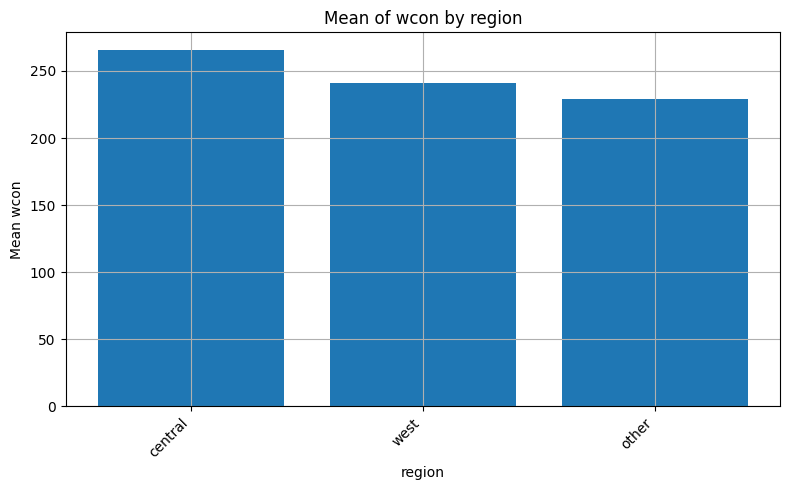

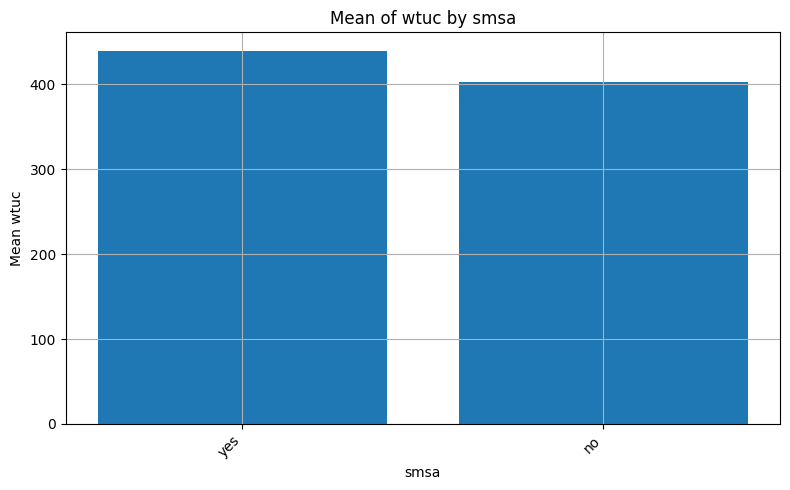

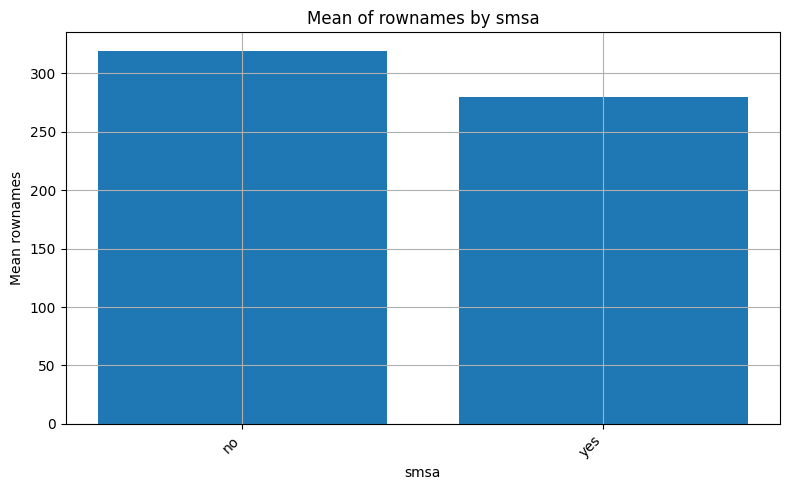

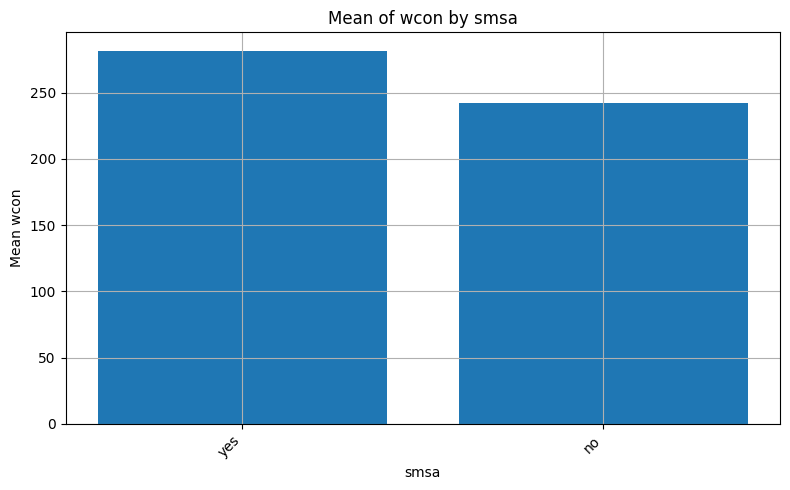

In [54]:

# Correlation matrix (numeric)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8,6))
    im = plt.imshow(corr, aspect='auto')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title("Correlation Matrix (numeric features)")
    plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols, rotation=90)
    plt.yticks(ticks=np.arange(len(num_cols)), labels=num_cols)
    plt.tight_layout()
    plt.show()

    # Top correlated pairs (by absolute correlation, excluding self-corr)
    corr_unstack = corr.abs().where(~np.eye(corr.shape[0], dtype=bool)).unstack().dropna()
    top_pairs = corr_unstack.sort_values(ascending=False).drop_duplicates().head(5)
    print("Top correlated numeric pairs (abs):")
    display(top_pairs)

    # Scatter plots for top pairs
    for (a, b), val in top_pairs.items():
        plt.figure()
        plt.scatter(df[a], df[b], s=10)
        plt.title(f"Scatter: {a} vs {b} (|r|={val:.2f})")
        plt.xlabel(a)
        plt.ylabel(b)
        plt.tight_layout()
        plt.show()

# Numeric vs Categorical: pick categorical columns with few unique values (2–10)
cand_cat = [c for c in df.select_dtypes(exclude=[np.number]).columns if 2 <= df[c].nunique() <= 10]
cand_cat = cand_cat[:2]  # limit to 2 categorical columns

# For each selected categorical column, pick up to 3 numeric columns (highest variance) and plot group-wise mean (one numeric at a time)
if cand_cat and num_cols:
    var_order = df[num_cols].var().sort_values(ascending=False).index.tolist()[:3]
    for ccol in cand_cat:
        for ncol in var_order:
            group_mean = df.groupby(ccol)[ncol].mean().sort_values(ascending=False)
            plt.figure()
            plt.bar(group_mean.index.astype(str), group_mean.values)
            plt.title(f"Mean of {ncol} by {ccol}")
            plt.xlabel(ccol)
            plt.ylabel(f"Mean {ncol}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()


#7. Mulitivariate Analysis

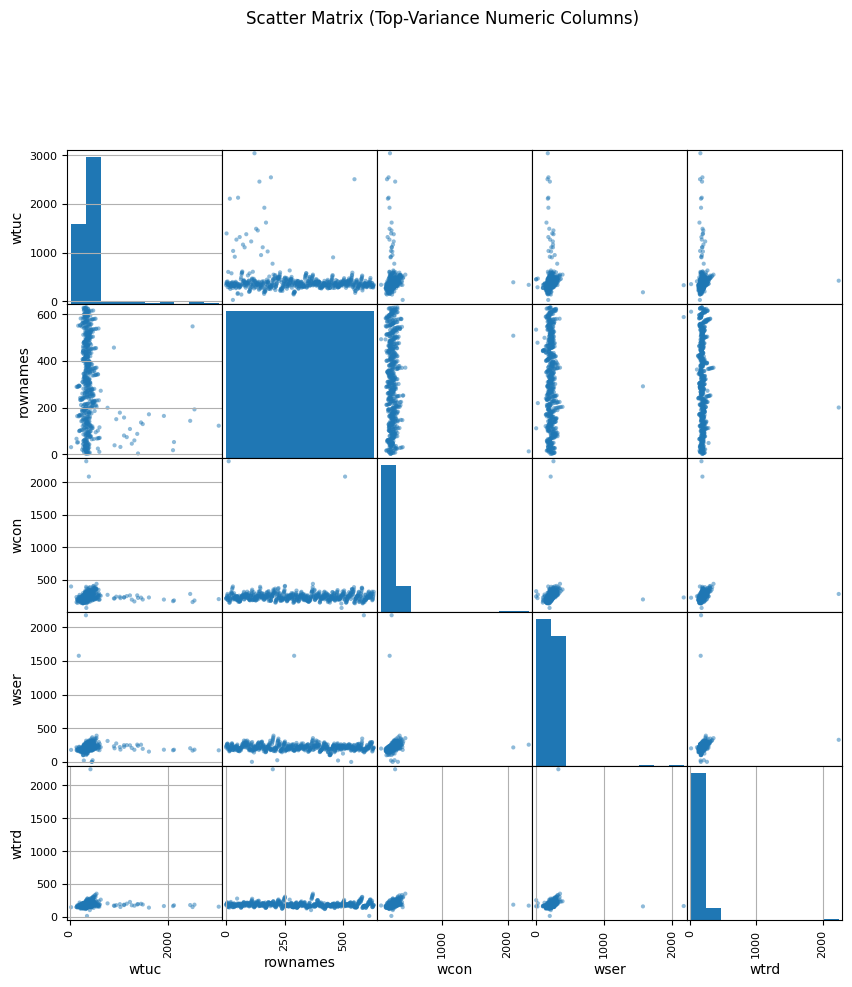

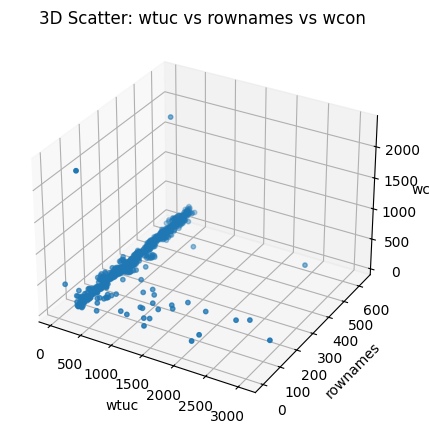

In [55]:

# Scatter Matrix (choose up to 5 high-variance numeric columns)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 3:
    top5 = df[num_cols].var().sort_values(ascending=False).index.tolist()[:5]
    axarr = scatter_matrix(df[top5], figsize=(10, 10), diagonal='hist')
    # Tight layout for readability
    plt.suptitle("Scatter Matrix (Top-Variance Numeric Columns)", y=1.02)
    plt.show()

# 3D Scatter (pick three numeric columns with highest variance)
if len(num_cols) >= 3:
    top3 = df[num_cols].var().sort_values(ascending=False).index.tolist()[:3]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[top3[0]], df[top3[1]], df[top3[2]], s=10)
    ax.set_title(f"3D Scatter: {top3[0]} vs {top3[1]} vs {top3[2]}")
    ax.set_xlabel(top3[0])
    ax.set_ylabel(top3[1])
    ax.set_zlabel(top3[2])
    plt.show()
